# Setup environment and install requirements

This code snippet imports the required libraries for data manipulation visualization, mathematical calculations, and machine learning.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import CategoricalDtype
from scipy.spatial.distance import cdist
from math import radians, sin, cos, sqrt, atan2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

# Data loader

This code snippet loads multiple datasets into pandas DataFrames. It reads the dataset files from the specified file paths using the read_csv function.
Five different datasets are loaded:


*   df = Original dataset contains ridership information for each station.
*   df_covid_loc

		Reporting_PHU_ID	Reporting_PHU	Reporting_PHU_Address	Reporting_PHU_City	Reporting_PHU_Latitude	Reporting_PHU_Longitude


*   df_covid_status
		Reporting_PHU	Reporting_PHU_id	Status_PHU	start_date	end_date	PHU_url


*   df_weather
		Date/Time	Year	Month	Day	Max Temp (°C)	Min Temp (°C)	Total Rain (mm)	Total Snow (cm)	Snow on Grnd (cm)	Spd of Max Gust (km/h)


*   df_station_with_covid_range = it is an integration of df_covid_loc and df_covid_status based on (Reporting_PHU_ID)



In [ ]:
# Load the dataset into a pandas DataFrame
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ridership Prediction/Dataset/dataset_original.csv')
#df_1_5 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Predict BSS/1_5.xlsx')
#df_6_7 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Predict BSS/6_7.xlsx')
df_8_9 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Predict BSS/8_9.xlsx')
df_10_12 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Predict BSS/10_12.xlsx')



In [ ]:
df = pd.concat([df_8_9, df_10_12], ignore_index=True)
df = df.sample(n=200000, random_state=42)
df

Trip Id  Trip  Duration  Start Station Id          Start Time  \
510535   13408801             428              7542 2021-09-01 20:11:00   
1378565  14419201             350              7473 2021-11-07 05:26:00   
594883   13505193            1731              7654 2021-09-06 16:48:00   
624759   13540595             729              7189 2021-09-08 19:12:00   
276737   13142544             213              7509 2021-08-18 15:38:00   
...           ...             ...               ...                 ...   
937927   13900948            1390              7069 2021-09-30 08:04:00   
749232   13683049             427              7280 2021-09-16 20:34:00   
1043631  14024904             964              7022 2021-10-07 20:11:00   
1548953  14619987             697              7171 2021-11-27 17:05:00   
713803   13642235             579              7065 2021-09-14 17:21:00   

                                    Start Station Name  End Station Id  \
510535                            Queen St W / John St          7462.0   
1378565                   Adelaide St W / Strachan Ave          7463.0   
594883                Bloor St W / Pacific Ave - SMART          7436.0   
624759                        Augusta Ave / Denison Sq          7208.0   
276737                          Ontario St / King St E          7489.0   
...                                                ...             ...   
937927                        Queen St W / Spadina Ave          7236.0   
749232                Charles St E / Jarvis St - SMART          7660.0   
1043631                         Simcoe St / Queen St W          7203.0   
1548953  Ontario Place Blvd / Lake Shore Blvd W (East)          7017.0   
713803                     Dundas St E / Parliament St          7299.0   

                   End Time                               End Station Name  \
510535  2021-09-01 20:19:00                       Richmond St E / Yonge St   
1378565 2021-11-07 05:32:00                       Adelaide St W / Brant St   
594883  2021-09-06 17:17:00                            Shaw St / Dupont St   
624759  2021-09-08 19:24:00       80 Clinton St (North of College) - SMART   
276737  2021-08-18 15:42:00                        Sumach St  / Queen St E   
...                     ...                                            ...   
937927  2021-09-30 08:27:00            Thompson St / Broadview Ave - SMART   
749232  2021-09-16 20:41:00                                285 Victoria St   
1043631 2021-10-07 20:27:00  Bathurst St/Queens Quay(Billy Bishop Airport)   
1548953 2021-11-27 17:16:00                      Widmer St / Adelaide St W   
713803  2021-09-14 17:31:00                        Mill St / Parliament St   

         Bike Id      User Type  Month  Day  Year      Time AM-PM  
510535      2819  Annual Member      9    1  2021  08:11:00    PM  
1378565     4961  Casual Member     11    7  2021  05:26:00    AM  
594883       403  Annual Member      9    6  2021  04:48:00    PM  
624759      2802  Annual Member      9    8  2021  07:12:00    PM  
276737      2155  Annual Member      8   18  2021  03:38:00    PM  
...          ...            ...    ...  ...   ...       ...   ...  
937927      2009  Annual Member      9   30  2021  08:04:00    AM  
749232       528  Casual Member      9   16  2021  08:34:00    PM  
1043631      447  Casual Member     10    7  2021  08:11:00    PM  
1548953     6581  Casual Member     11   27  2021  05:05:00    PM  
713803      3236  Casual Member      9   14  2021  05:21:00    PM  

[200000 rows x 15 columns]

In [ ]:
df.to_csv('df.csv', index=False)

In [ ]:
# prompt: Using dataframe df: number of records per month and save the result into a corresponding row in df

df['Ridership'] = df.groupby('Month')['Month'].transform('count')


In [ ]:
df

Trip Id  Trip  Duration  Start Station Id          Start Time  \
0        10644218            1315              7021 2021-01-01 00:04:00   
1        10644220             396              7534 2021-01-01 00:07:00   
2        10644221              86              7162 2021-01-01 00:10:00   
3        10644222             741              7003 2021-01-01 00:10:00   
4        10644223            2073              7562 2021-01-01 00:11:00   
...           ...             ...               ...                 ...   
3575176  14805103             372              7065 2021-12-31 23:56:00   
3575177  14805104             762              7233 2021-12-31 23:56:00   
3575178  14805105             355              7065 2021-12-31 23:56:00   
3575179  14805107             770              7292 2021-12-31 23:56:00   
3575180  14805108            1307              7057 2021-12-31 23:59:00   

                           Start Station Name  End Station Id  \
0                          Bay St / Albert St          7164.0   
1                     Walnut Ave / Queen St W          7524.0   
2                    Hayter St / Laplante Ave          7006.0   
3                    Madison Ave / Bloor St W          7272.0   
4        Priscilla  Ave / Dundas St W - SMART          7562.0   
...                                       ...             ...   
3575176           Dundas St E / Parliament St          7472.0   
3575177              King / Cowan Ave - SMART          7569.0   
3575178           Dundas St E / Parliament St          7472.0   
3575179         Granby St / Church St - SMART          7076.0   
3575180       Simcoe St / Wellington St South          7383.0   

                   End Time                          End Station Name  \
0       2021-01-01 00:26:00  Gould St / Yonge St (Ryerson University)   
1       2021-01-01 00:13:00                               Lisgar Park   
2       2021-01-01 00:11:00           Bay St / College St (East Side)   
3       2021-01-01 00:22:00           Yonge St / Dundonald St - SMART   
4       2021-01-01 00:45:00      Priscilla  Ave / Dundas St W - SMART   
...                     ...                                       ...   
3575176 2022-01-01 00:02:00                 Dundas St E / Victoria St   
3575177 2022-01-01 00:08:00                     Toronto Inukshuk Park   
3575178 2022-01-01 00:02:00                 Dundas St E / Victoria St   
3575179 2022-01-01 00:09:00                   York St / Queens Quay W   
3575180 2022-01-01 00:21:00                             12 Harbour St   

         Bike Id      User Type  Month  Day  Year      Time AM-PM  \
0         6795.0  Annual Member      1    1  2021  12:04:00    AM   
1         4176.0  Casual Member      1    1  2021  12:07:00    AM   
2         1814.0  Annual Member      1    1  2021  12:10:00    AM   
3          198.0  Casual Member      1    1  2021  12:10:00    AM   
4         6688.0  Casual Member      1    1  2021  12:11:00    AM   
...          ...            ...    ...  ...   ...       ...   ...   
3575176   3487.0  Casual Member     12   31  2021  11:56:00    PM   
3575177   4195.0  Annual Member     12   31  2021  11:56:00    PM   
3575178   4574.0  Casual Member     12   31  2021  11:56:00    PM   
3575179   5879.0  Annual Member     12   31  2021  11:56:00    PM   
3575180   1655.0  Annual Member     12   31  2021  11:59:00    PM   

         records_per_month  Ridership  
0                    86371      86371  
1                    86371      86371  
2                    86371      86371  
3                    86371      86371  
4                    86371      86371  
...                    ...        ...  
3575176             145849     145849  
3575177             145849     145849  
3575178             145849     145849  
3575179             145849     145849  
3575180             145849     145849  

[3575181 rows x 17 columns]

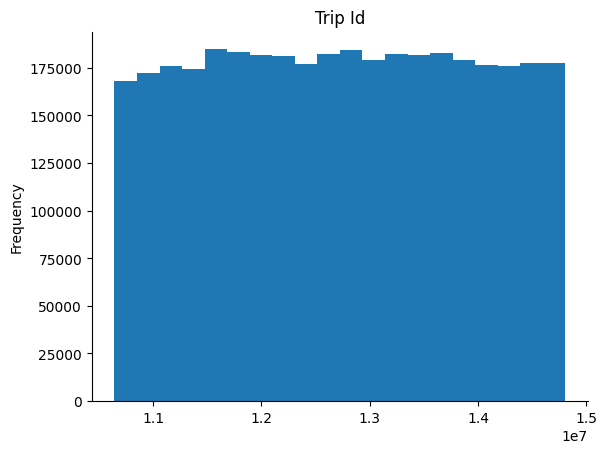

In [ ]:
from matplotlib import pyplot as plt
df['Trip Id'].plot(kind='hist', bins=20, title='Trip Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Exploration

In [ ]:
def my_plot(x,y, x_label, y_label, title):
  plt.figure(figsize=(15, 6))
  plt.plot(x,y)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()

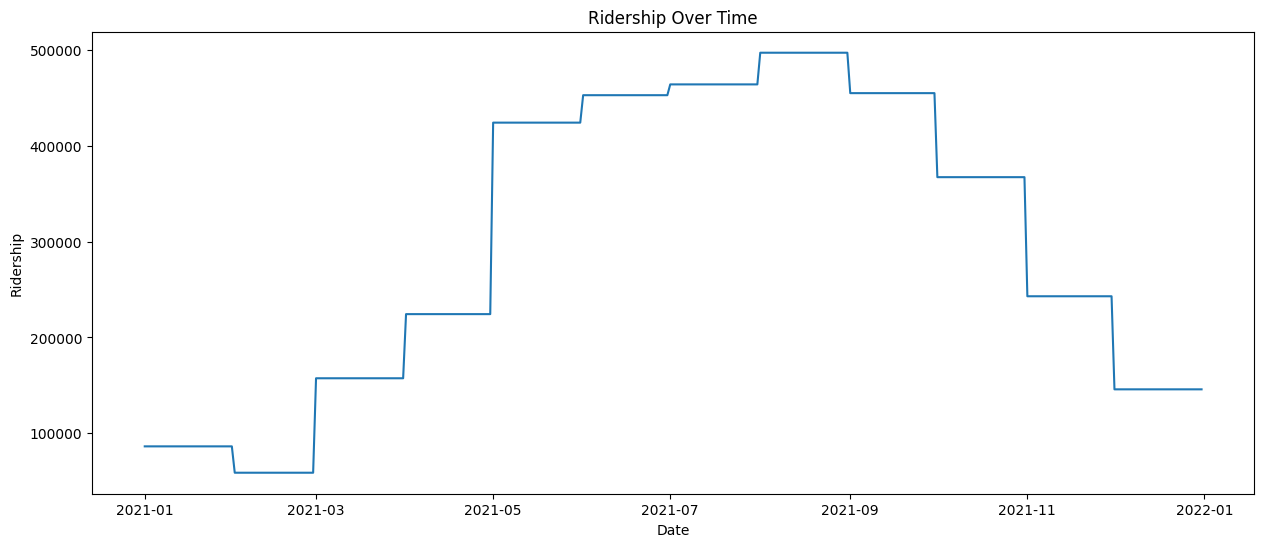

In [ ]:
# Create a line plot of 'Ridership' over time (day)
df_new = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str)  + '-' + df['Day'].astype(str))
my_plot(df_new, df['Ridership'], 'Date','Ridership','Ridership Over Time')

In [ ]:
# Group by year and month, calculate the sum of ridership
grouped_dataset = df.groupby(['Year', 'Month']).sum().reset_index()
time_period_mapping = {
    'AM': 0,
    'PM': 1,
}

# Map the month names to numbers using the mapping dictionary
grouped_dataset['Month_Number'] = grouped_dataset['Month']
grouped_dataset = grouped_dataset.sort_values(by=['Year', 'Month_Number'])

<ipython-input-9-5624d7af94db>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_dataset = df.groupby(['Year', 'Month']).sum().reset_index()


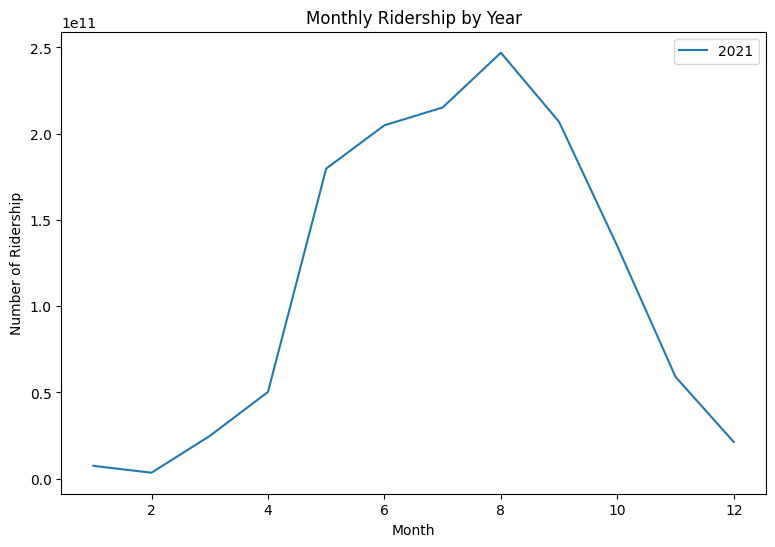

In [ ]:
###################### Monthly Ridership by Year ###############################

years = grouped_dataset['Year'].unique()

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
for year in years:
    year_data = grouped_dataset[grouped_dataset['Year'] == year]
    plt.plot(year_data['Month'], year_data['Ridership'], label=str(year))

plt.title('Monthly Ridership by Year')
plt.xlabel('Month')
plt.ylabel('Number of Ridership')
plt.legend()

<ipython-input-31-44037fe671fe>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_stations = df.groupby(['Start Station Name', 'Month']).sum().reset_index()


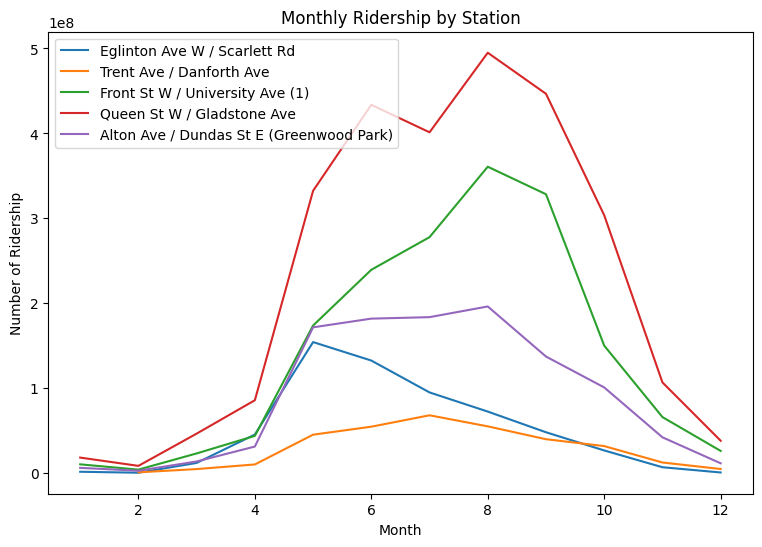

In [ ]:
###################### Monthly Ridership by Station ############################

# Group by Station and Month and calculate the sum of ridership
grouped_stations = df.groupby(['Start Station Name', 'Month']).sum().reset_index()
grouped_stations['Month_Number'] = grouped_stations['Month']

# Create a list of unique years for plotting
years = grouped_stations['Year'].unique()
random_stations = grouped_stations['Start Station Name'].sample(n=5).unique()

# Sort the DataFrame by Station and Month_Number
grouped_stations = grouped_stations.sort_values(by=['Start Station Name', 'Month_Number'])

# Define the order of the Month categories
#month_order = sorted(df['Month'].unique(), key=lambda x: month_mapping[x])
month_order = sorted(df['Month'].unique())
# Convert 'Month' column to a categorical data type with the desired order
cat_dtype = CategoricalDtype(categories=month_order, ordered=True)
grouped_stations['Month'] = grouped_stations['Month'].astype(cat_dtype)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

# Plot each station with different symbology
for station in random_stations:
    station_data = grouped_stations[grouped_stations['Start Station Name'] == station]
    sns.lineplot(data=station_data, x='Month', y='Ridership', label=str(station))

plt.title('Monthly Ridership by Station')
plt.xlabel('Month')
plt.ylabel('Number of Ridership')
plt.legend()


<ipython-input-6-b4d68af693c1>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_year_time = df.groupby(['Month', 'AM-PM']).sum().reset_index()


Month AM-PM        Trip Id  Trip  Duration  Start Station Id  \
0      1    AM   238925679538        16252711         161944403   
1      1    PM   684952136558        51865379         464328391   
2      2    AM   150292311578        10573446         101003493   
3      2    PM   484853058098        37520794         325769427   
4      3    AM   361903360941        30433768         240713980   
5      3    PM  1356996588498       126801581         902340387   
6      4    AM   483038533133        42235355         314955145   
7      4    PM  2017524954932       216919088        1316768695   
8      5    AM   899325562063        87999971         568256284   
9      5    PM  3989615293707       477282492        2518999549   

   End Station Id       Bike Id      Day       Year     Ridership  
0    1.611378e+08  9.659108e+07   342526   45145098    1929355398  
1    4.626589e+08  2.798882e+08   969027  129410693    5530594243  
2    1.009637e+08  5.838616e+07   199153   28164656     820537744  
3    3.255472e+08  1.927578e+08   683133   90829803    2646198897  
4    2.403872e+08  1.352326e+08   578098   67018381    5219441917  
5    9.011219e+08  5.069054e+08  2283961  251080956   19554373692  
6    3.146942e+08  1.805320e+08   669700   87571951    9719099969  
7    1.315817e+09  7.448789e+08  2713355  365736328   40590941432  
8    5.678945e+08  3.057553e+08  1372096  157827974   33113574068  
9    2.517374e+09  1.333960e+09  6268033  699120488  146681082416

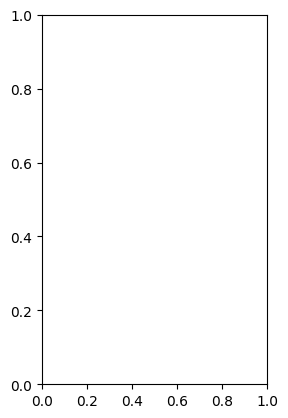

In [ ]:
######################## Time Period for each Month #############################

# Group by Month and Time Period and calculate the sum of ridership
grouped_year_time = df.groupby(['Month', 'AM-PM']).sum().reset_index()

# Define the order of the Time Period categories
time_period_order = ['AM', 'PM']

# Convert 'Time Period' column to a categorical data type with the desired order
cat_dtype = CategoricalDtype(categories=time_period_order, ordered=True)
grouped_year_time['AM-PM'] = grouped_year_time['AM-PM'].astype(cat_dtype)

# Create a list of months for plotting
months = grouped_year_time['Month'].unique()

plt.subplot(1, 2, 2)
grouped_year_time

<Axes: xlabel='Trip  Duration', ylabel='Count'>

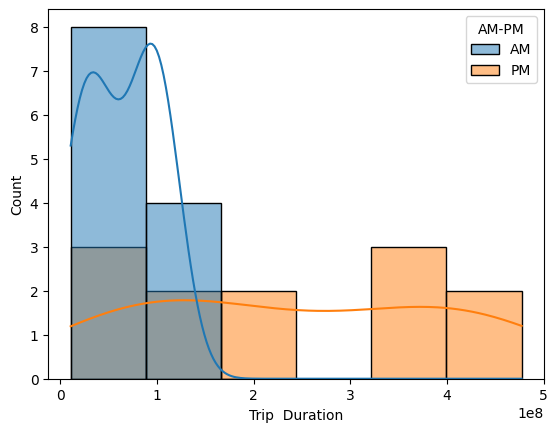

In [ ]:
# @title Trip Duration Distribution by AM/PM

sns.histplot(x = 'Trip  Duration', hue = 'AM-PM', data = grouped_year_time, kde = True)

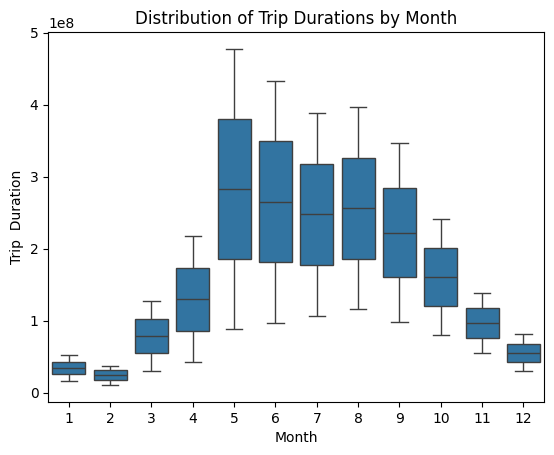

In [ ]:
# @title Distribution of Trip Durations by Month

import matplotlib.pyplot as plt
sns.boxplot(data=grouped_year_time, x="Month", y="Trip  Duration")
_ = plt.title("Distribution of Trip Durations by Month")

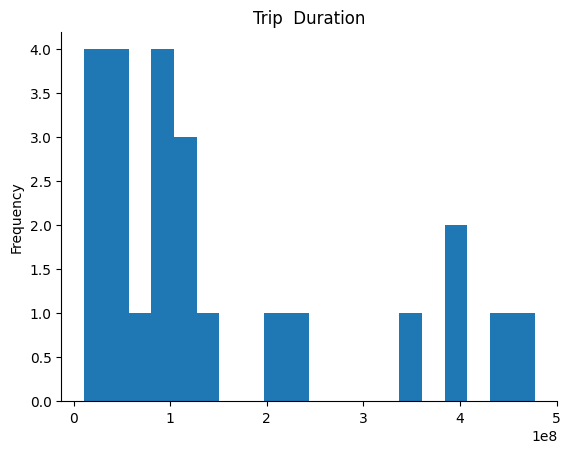

In [ ]:
# @title Trip  Duration

from matplotlib import pyplot as plt
grouped_year_time['Trip  Duration'].plot(kind='hist', bins=20, title='Trip  Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:



# Plot each year with different symbology
for month in months:
    month_data = grouped_year_time[grouped_year_time['Month'] == month]
    sns.lineplot(data=month_data, x='Time', y='Ridership', label=str(month))

plt.title('Time Period for each Month')
plt.xlabel('Time Period')
plt.ylabel('Number of Ridership')
plt.legend()
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Time` for `x`. An entry with this name does not appear in `data`.

<ipython-input-9-d54685d185c7>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_station_time = df.groupby(['Start Station Name', 'AM-PM']).sum().reset_index()


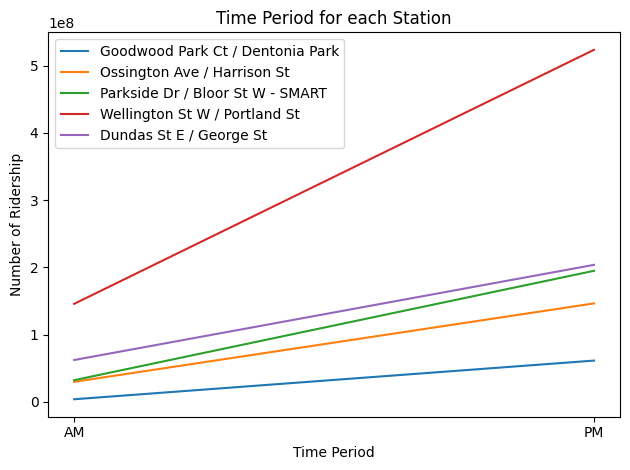

In [ ]:
######################## Time Period for each Station ##########################

# Group by Station and Time Period and calculate the sum of ridership
grouped_station_time = df.groupby(['Start Station Name', 'AM-PM']).sum().reset_index()
grouped_station_time['Time_Period_Num'] = grouped_station_time['AM-PM'].map(time_period_mapping)

# Define the order of the Time Period categories
time_period_order = ['AM','PM']

# Convert 'Time Period' column to a categorical data type with the desired order
cat_dtype = CategoricalDtype(categories=time_period_order, ordered=True)
grouped_station_time['AM-PM'] = grouped_station_time['AM-PM'].astype(cat_dtype)

# Create a list of stations for plotting
stations = grouped_station_time['Start Station Name'].sample(n=5).unique()


# Sort the DataFrame by Station and Time_Period_Num
grouped_station_time = grouped_station_time.sort_values(by=['Start Station Name', 'Time_Period_Num'])

# Plot each station with different symbology
for station in stations:
    station_data = grouped_station_time[grouped_station_time['Start Station Name'] == station]
    sns.lineplot(data=station_data, x='AM-PM', y='Ridership', label=str(station))

plt.title('Time Period for each Station')
plt.xlabel('Time Period')
plt.ylabel('Number of Ridership')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-57-93ac8e5d904c>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_station_january = df[df['Month'] == 1].groupby(['Year', 'Day']).sum().reset_index()


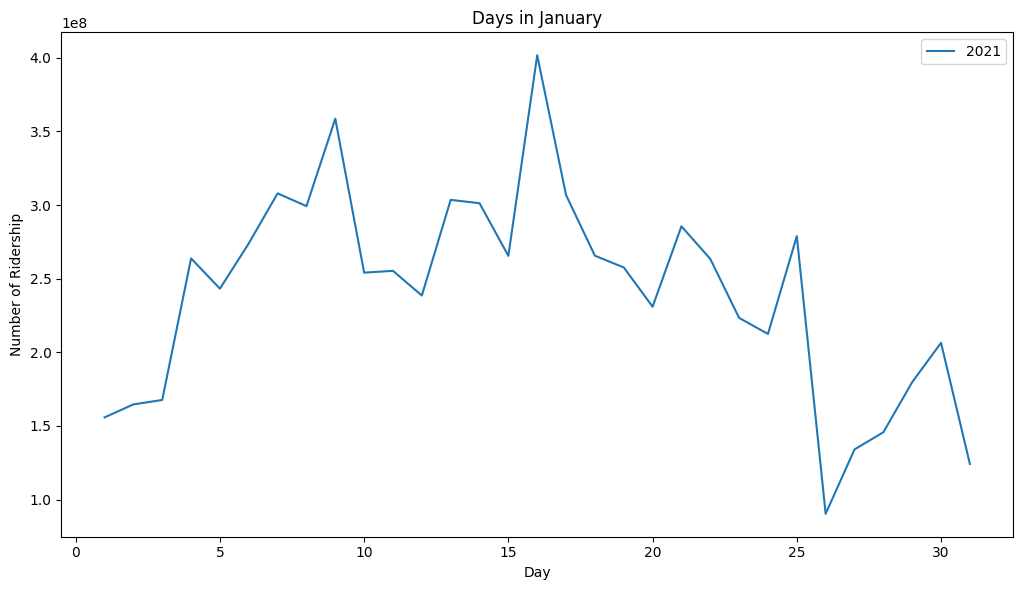

In [ ]:


'''# Weekly Ridership by Year
grouped_weekly = df.groupby(['Year', 'Week Number']).sum().reset_index()
years = grouped_weekly['Year'].unique()

plt.subplot(1, 2, 2)
for year in years:
    year_data = grouped_weekly[grouped_weekly['Year'] == year]
    plt.plot(year_data['Week Number'], year_data['Ridership'], label=str(year))

plt.title('Weekly Ridership by Year')
plt.xlabel('Week Number')
plt.ylabel('Number of Ridership')
plt.legend()
plt.tight_layout()
plt.show()'''





############################### Days in a Month ################################
# Visualizing January
grouped_station_january = df[df['Month'] == 1].groupby(['Year', 'Day']).sum().reset_index()

# Create a list of year for plotting
stations = grouped_station_january['Year'].unique()
grouped_station_january = grouped_station_january.sort_values(by=['Day'])

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

# Plot each year with different symbology
for station in stations:
    station_data = grouped_station_january[grouped_station_january['Year'] == station]
    plt.plot(station_data['Day'], station_data['Ridership'], label=str(station))

plt.title('Days in January')
plt.xlabel('Day')
plt.ylabel('Number of Ridership')
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-58-c1d4fded4fc1>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_station_january = df[df['Month'] == 3].groupby(['Year', 'Day']).sum().reset_index()


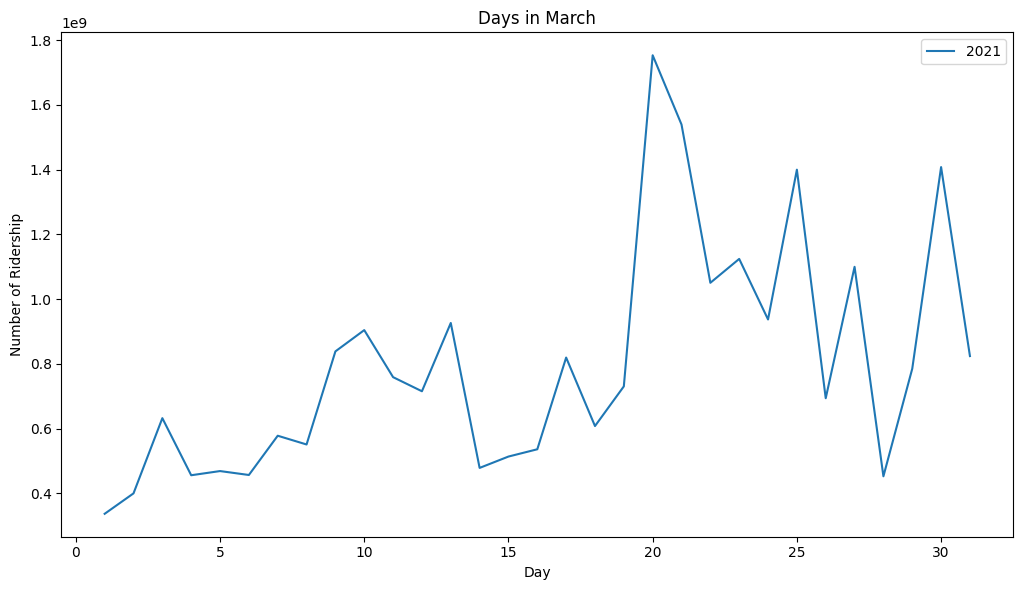

In [ ]:
############################### Days in a Month ################################
# Visualizing March
grouped_station_january = df[df['Month'] == 3].groupby(['Year', 'Day']).sum().reset_index()

# Create a list of year for plotting
stations = grouped_station_january['Year'].unique()
grouped_station_january = grouped_station_january.sort_values(by=['Day'])

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

# Plot each year with different symbology
for station in stations:
    station_data = grouped_station_january[grouped_station_january['Year'] == station]
    plt.plot(station_data['Day'], station_data['Ridership'], label=str(station))

plt.title('Days in March')
plt.xlabel('Day')
plt.ylabel('Number of Ridership')
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-59-cfc914ba38a7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_station_january = df[df['Month'] == 5].groupby(['Year', 'Day']).sum().reset_index()


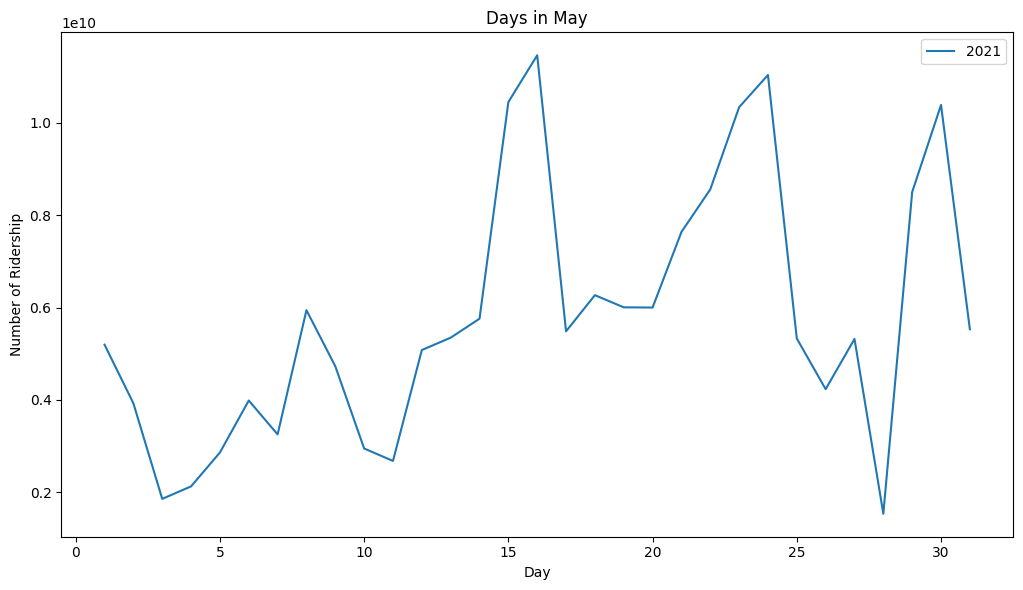

In [ ]:
############################### Days in a Month ################################
# Visualizing May
grouped_station_january = df[df['Month'] == 5].groupby(['Year', 'Day']).sum().reset_index()

# Create a list of year for plotting
stations = grouped_station_january['Year'].unique()
grouped_station_january = grouped_station_january.sort_values(by=['Day'])

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

# Plot each year with different symbology
for station in stations:
    station_data = grouped_station_january[grouped_station_january['Year'] == station]
    plt.plot(station_data['Day'], station_data['Ridership'], label=str(station))

plt.title('Days in May')
plt.xlabel('Day')
plt.ylabel('Number of Ridership')
plt.legend()

plt.tight_layout()
plt.show()

# Feature Engineering

This code snippet creates a grid of scatter plots for each combination of variables in the df, allowing us to visualize the relationships between them.


*   Note 1: This only detects numerical columns.
*   Note 2: It can only find linear relationships.



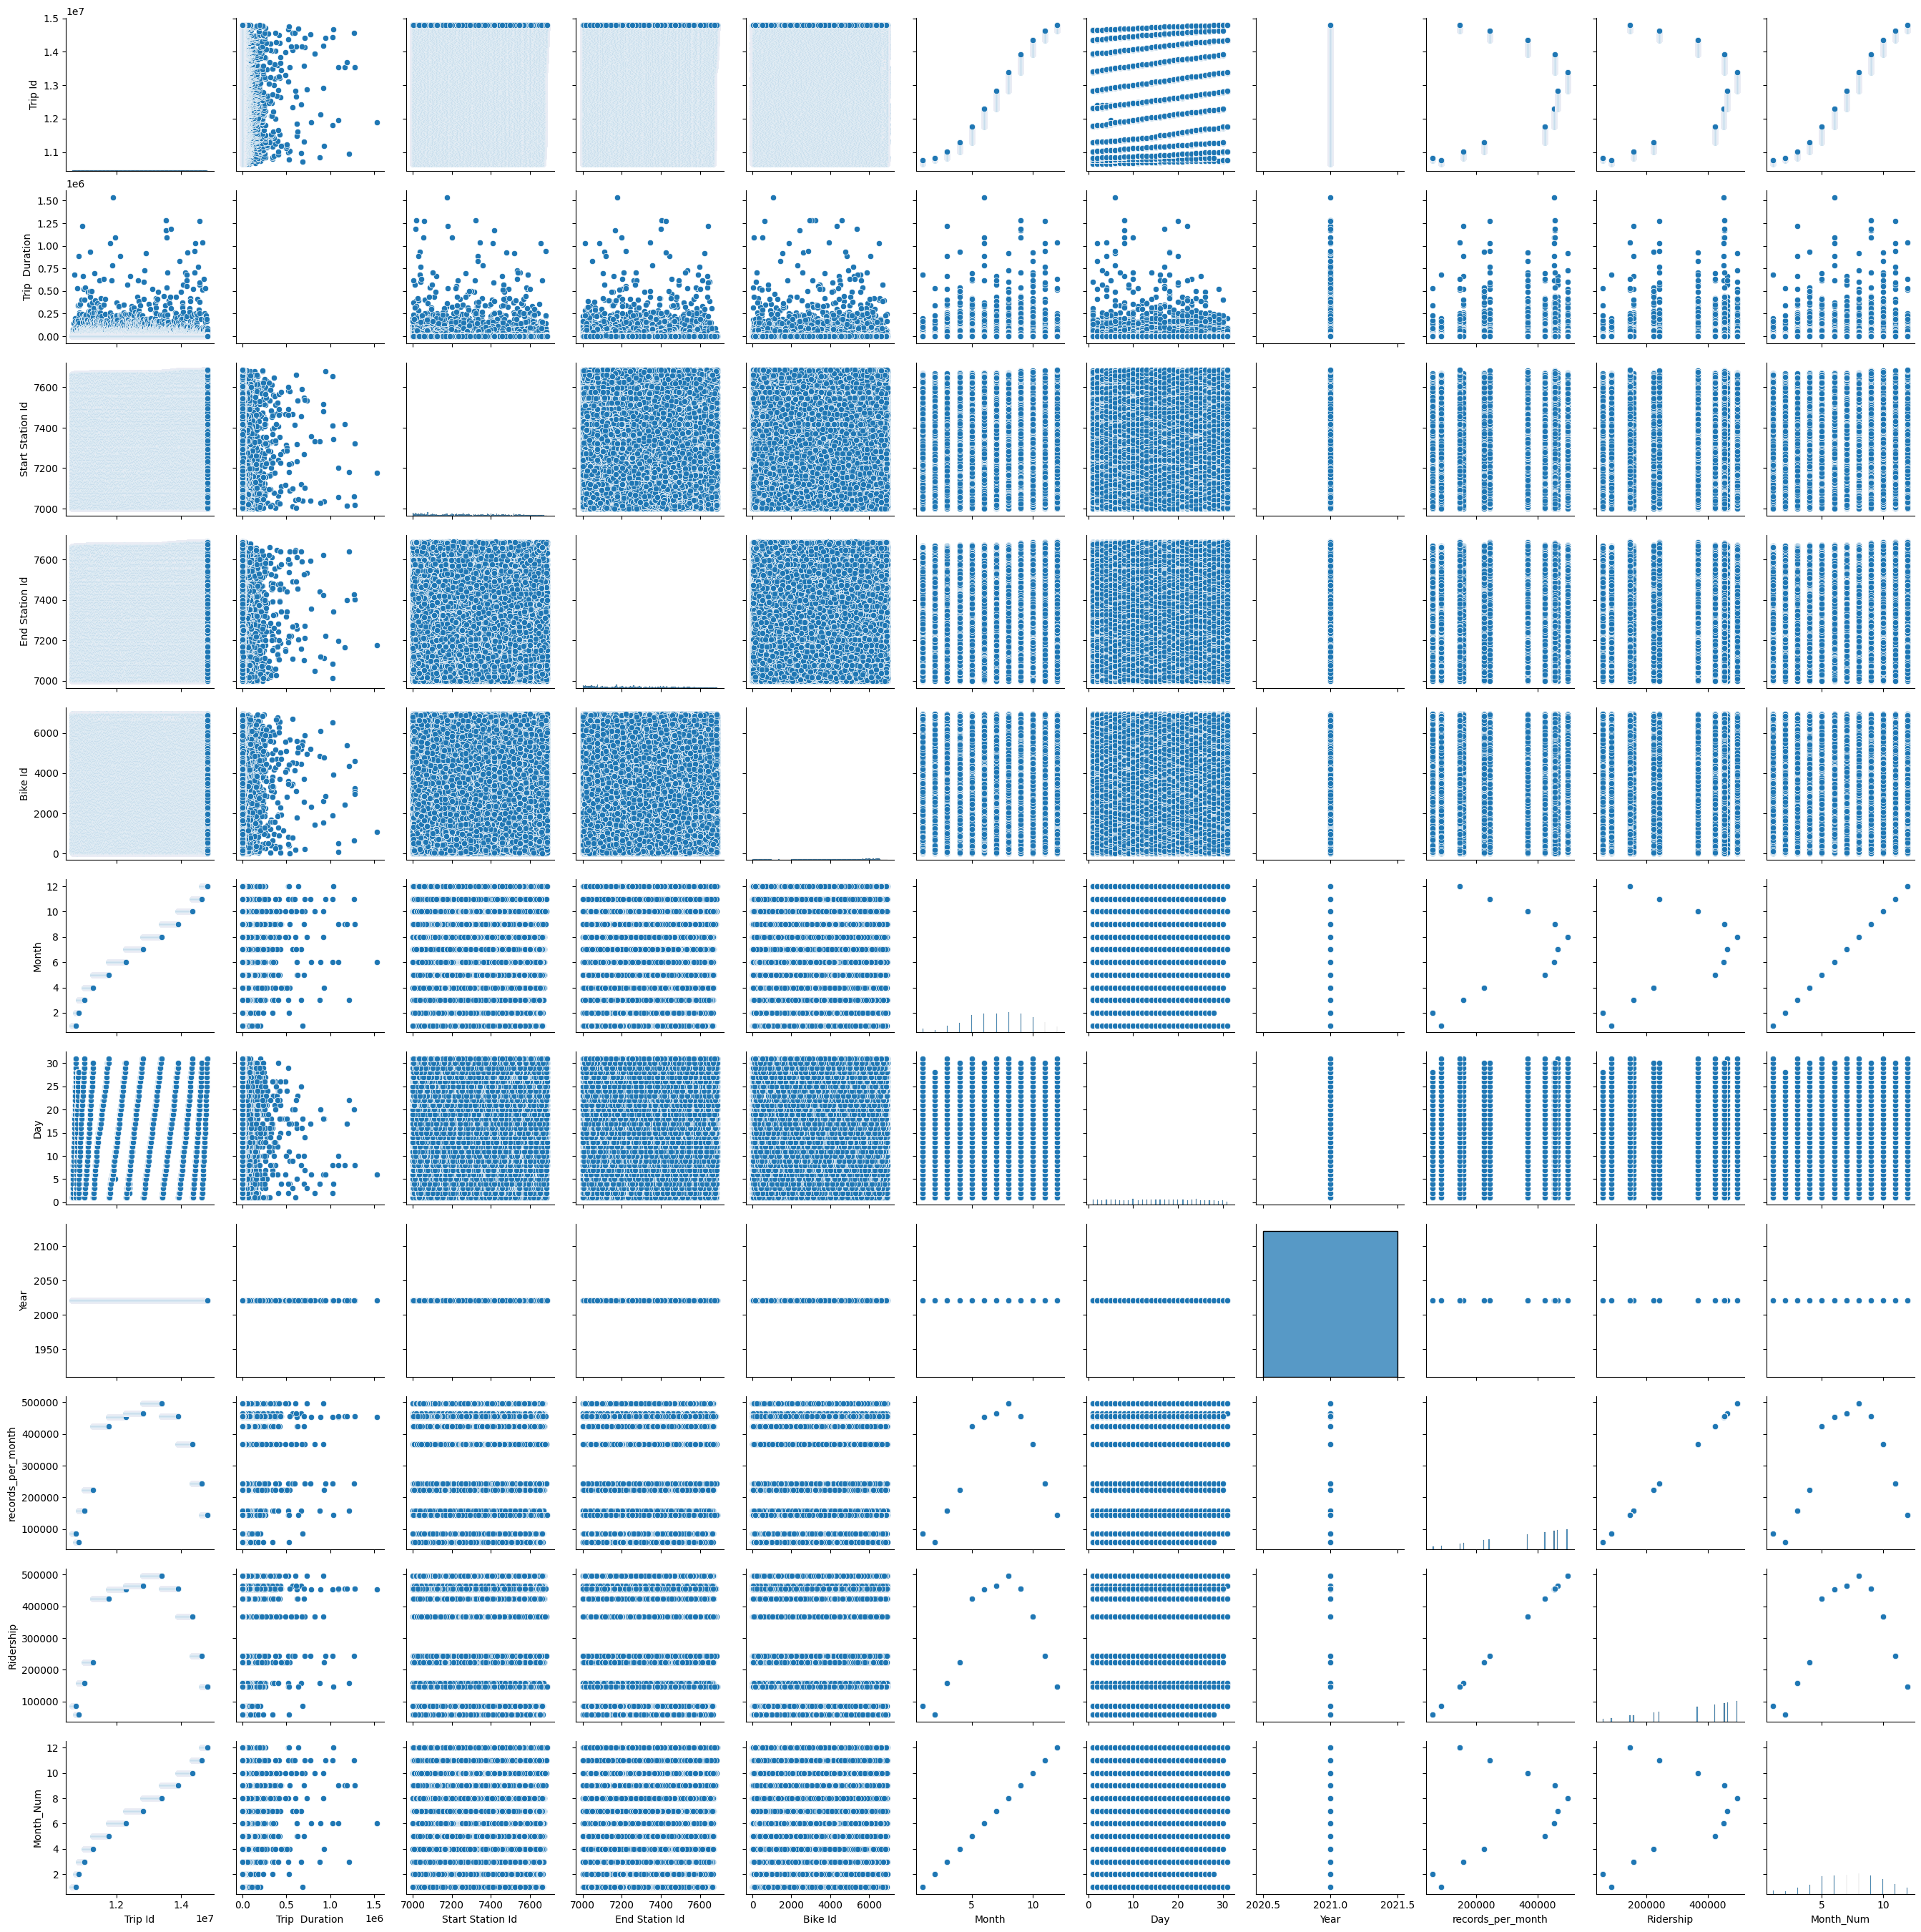

In [ ]:
#df['Time_Period_Num'] = df['Time Period'].map(time_period_mapping)
df['Month_Num'] = df['Month']

df_rel =df
import seaborn as sns
sns.pairplot(df_rel)

This code snippet demonstrates how to create a heatmap of the correlation values between variables in a DataFrame using seaborn.
*   Note 1: This only detects numerical columns.
*   Note 2: It can only find linear relationships.

 **Collinearity is obvious between Month_Num and Week Number. We can use PCA (we will lose Interpretability) or regularization methods**

<ipython-input-62-f3ce86971321>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_rel.corr(), annot=True, cmap="YlGnBu")


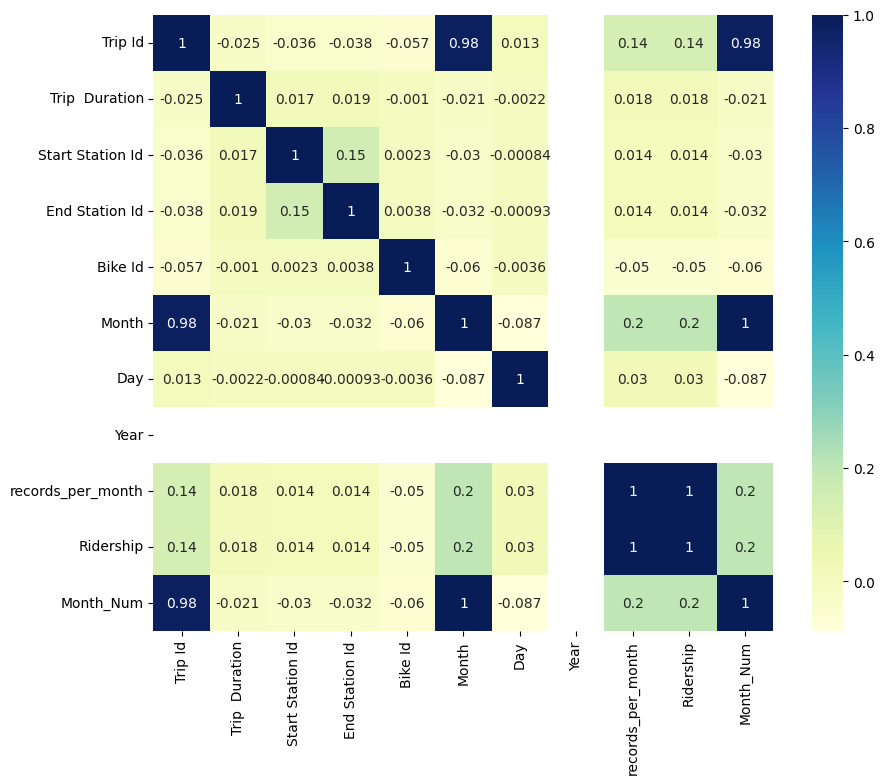

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap with correlation values
sns.heatmap(df_rel.corr(), annot=True, cmap="YlGnBu")

# Show the plot
plt.show()

<ipython-input-63-9bb10fa97145>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_correlation.corr(), annot=True, cmap="YlGnBu")


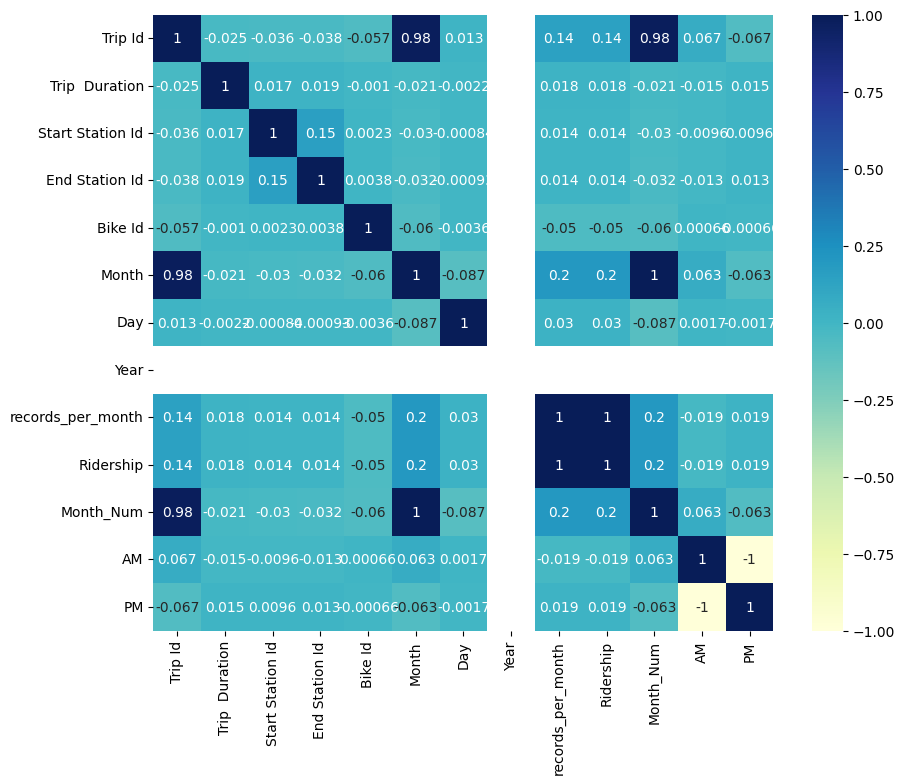

In [ ]:
# Get the one-hot encoded representation of 'Time Period'
time_period_dummies = pd.get_dummies(df['AM-PM'])
# Concatenate the dummy variables to the original dataframe
df_correlation = pd.concat([df_rel, time_period_dummies], axis=1)

plt.figure(figsize=(10, 8))
# Create the heatmap with correlation values
sns.heatmap(df_correlation.corr(), annot=True, cmap="YlGnBu")

# Show the plot
plt.show()

This snippet code converts cetagorical features to One-Hot shots. Different senarios have been tested and the best senario is to encode Month,Day, Rail Corridor , Weekend&Holidays/weekday, Station and Time Period.



*   In order to keep end of each month close to the first day of next month, I moved Day to a 2D space.
*   I tested the same thing for weeks but it didn't work.





In [ ]:
df

Trip Id  Trip  Duration  Start Station Id          Start Time  \
0        10644218            1315              7021 2021-01-01 00:04:00   
1        10644220             396              7534 2021-01-01 00:07:00   
2        10644221              86              7162 2021-01-01 00:10:00   
3        10644222             741              7003 2021-01-01 00:10:00   
4        10644223            2073              7562 2021-01-01 00:11:00   
...           ...             ...               ...                 ...   
3575176  14805103             372              7065 2021-12-31 23:56:00   
3575177  14805104             762              7233 2021-12-31 23:56:00   
3575178  14805105             355              7065 2021-12-31 23:56:00   
3575179  14805107             770              7292 2021-12-31 23:56:00   
3575180  14805108            1307              7057 2021-12-31 23:59:00   

                           Start Station Name  End Station Id  \
0                          Bay St / Albert St          7164.0   
1                     Walnut Ave / Queen St W          7524.0   
2                    Hayter St / Laplante Ave          7006.0   
3                    Madison Ave / Bloor St W          7272.0   
4        Priscilla  Ave / Dundas St W - SMART          7562.0   
...                                       ...             ...   
3575176           Dundas St E / Parliament St          7472.0   
3575177              King / Cowan Ave - SMART          7569.0   
3575178           Dundas St E / Parliament St          7472.0   
3575179         Granby St / Church St - SMART          7076.0   
3575180       Simcoe St / Wellington St South          7383.0   

                   End Time                          End Station Name  \
0       2021-01-01 00:26:00  Gould St / Yonge St (Ryerson University)   
1       2021-01-01 00:13:00                               Lisgar Park   
2       2021-01-01 00:11:00           Bay St / College St (East Side)   
3       2021-01-01 00:22:00           Yonge St / Dundonald St - SMART   
4       2021-01-01 00:45:00      Priscilla  Ave / Dundas St W - SMART   
...                     ...                                       ...   
3575176 2022-01-01 00:02:00                 Dundas St E / Victoria St   
3575177 2022-01-01 00:08:00                     Toronto Inukshuk Park   
3575178 2022-01-01 00:02:00                 Dundas St E / Victoria St   
3575179 2022-01-01 00:09:00                   York St / Queens Quay W   
3575180 2022-01-01 00:21:00                             12 Harbour St   

         Bike Id      User Type  Month  Day  Year      Time AM-PM  \
0         6795.0  Annual Member      1    1  2021  12:04:00    AM   
1         4176.0  Casual Member      1    1  2021  12:07:00    AM   
2         1814.0  Annual Member      1    1  2021  12:10:00    AM   
3          198.0  Casual Member      1    1  2021  12:10:00    AM   
4         6688.0  Casual Member      1    1  2021  12:11:00    AM   
...          ...            ...    ...  ...   ...       ...   ...   
3575176   3487.0  Casual Member     12   31  2021  11:56:00    PM   
3575177   4195.0  Annual Member     12   31  2021  11:56:00    PM   
3575178   4574.0  Casual Member     12   31  2021  11:56:00    PM   
3575179   5879.0  Annual Member     12   31  2021  11:56:00    PM   
3575180   1655.0  Annual Member     12   31  2021  11:59:00    PM   

         records_per_month  Ridership  Month_Num  
0                    86371      86371          1  
1                    86371      86371          1  
2                    86371      86371          1  
3                    86371      86371          1  
4                    86371      86371          1  
...                    ...        ...        ...  
3575176             145849     145849         12  
3575177             145849     145849         12  
3575178             145849     145849         12  
3575179             145849     145849         12  
3575180             145849     145849         12  

[3575181 

In [ ]:
def encode_categorical_features(df):

    KEEP_TOTAL_TRAIN_TRIPS = True
    if not KEEP_TOTAL_TRAIN_TRIPS:
        df = df.drop('Total Train Trips', axis=1)

    df['Month_Num'] = df['Month']

    def convert_day_to_circle(day):
        angle = 2 * np.pi * (day - 1) / 31  # Calculate the angle based on the day
        x = np.cos(angle)  # Compute the x-coordinate on the unit circle
        y = np.sin(angle)  # Compute the y-coordinate on the unit circle
        return x, y

    def convert_week_to_circle(week):
        angle = 2 * np.pi * (week - 1) / 53  # Calculate the angle based on the week
        x = np.cos(angle)  # Compute the x-coordinate on the unit circle
        y = np.sin(angle)  # Compute the y-coordinate on the unit circle
        return x, y

    if 'Start Time' in df.columns:
        print("date is a column in the dataframe.")
        df = df.drop('Start Time', axis=1)
    else:
        print("Good News! date is converted!")

    if 'End Time' in df.columns:
        print("date is a column in the dataframe.")
        df = df.drop('End Time', axis=1)
    else:
        print("Good News! date is converted!")

    if 'Time' in df.columns:
        print("date is a column in the dataframe.")
        df = df.drop('Time', axis=1)
    else:
        print("Good News! date is converted!")

    if 'Date' in df.columns:
        print("Date is a column in the dataframe.")
        df = df.drop('Date', axis=1)
    else:
        print("Good News! Date is converted!")

    categorical_features = ['Start Station Name', 'End Station Name', 'User Type', 'AM-PM']

    df['day_x'], df['day_y'] = zip(*df['Day'].map(convert_day_to_circle))
    X = df.drop('Ridership', axis=1)  # Features (excluding the target column)
    y = df['Ridership']  # Target column

    # Create a ColumnTransformer to apply OneHotEncoder to categorical features
    preprocessor = ColumnTransformer(
        transformers=[('', OneHotEncoder(), categorical_features)],
        remainder='passthrough'
    )

    # Apply the ColumnTransformer to encode categorical features
    X_encoded = preprocessor.fit_transform(X)

    # Convert the encoded features to a dense matrix
    X_encoded = X_encoded.toarray()

    # Convert the dense matrix to a DataFrame
    X_encoded = pd.DataFrame(X_encoded, columns=preprocessor.get_feature_names_out(),  index=X.index)

    return X_encoded

Now, I want to try find Mutual Information (MI) regression because the previous approaches only detect linear relationships.

In [ ]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

'''x_mi= encode_categorical_features(df)
#x_mi = x_mi.dropna()
x_mi = x_mi.fillna(0)
y_mi = df['Ridership']
#y_mi = y_mi.dropna()
def calculate_mutual_information(x_mi, y_mi):
    if isinstance(y_mi.iloc[0], str):  # Check if the target variable is categorical
        mi_scores = mutual_info_classif(x_mi, y_mi)
    else:
        mi_scores = mutual_info_regression(x_mi, y_mi)
    return mi_scores

# Assuming X is your feature matrix and y is your target column
mi_scores = calculate_mutual_information(x_mi, y_mi)
def plot_mutual_information(mi_scores, feature_names, top_n):
    sorted_indices = (-mi_scores).argsort()[:top_n]  # Get the indices of the top n scores
    top_mi_scores = mi_scores[sorted_indices]
    top_feature_names = feature_names[sorted_indices]

    plt.figure(figsize=(28, 6))
    sns.barplot(x=top_feature_names, y=top_mi_scores)
    plt.xlabel('Features')
    plt.ylabel('Mutual Information Score')
    plt.title('Top 10 Mutual Information Scores')
    plt.show()

# Assuming mi_scores contains the mutual information scores and feature_names contains the feature names
plot_mutual_information(mi_scores, x_mi.columns, top_n=10)'''

"x_mi= encode_categorical_features(df)\n#x_mi = x_mi.dropna()\nx_mi = x_mi.fillna(0)\ny_mi = df['Ridership']\n#y_mi = y_mi.dropna()\ndef calculate_mutual_information(x_mi, y_mi):\n    if isinstance(y_mi.iloc[0], str):  # Check if the target variable is categorical\n        mi_scores = mutual_info_classif(x_mi, y_mi)\n    else:\n        mi_scores = mutual_info_regression(x_mi, y_mi)\n    return mi_scores\n\n# Assuming X is your feature matrix and y is your target column\nmi_scores = calculate_mutual_information(x_mi, y_mi)\ndef plot_mutual_information(mi_scores, feature_names, top_n):\n    sorted_indices = (-mi_scores).argsort()[:top_n]  # Get the indices of the top n scores\n    top_mi_scores = mi_scores[sorted_indices]\n    top_feature_names = feature_names[sorted_indices]\n\n    plt.figure(figsize=(28, 6))\n    sns.barplot(x=top_feature_names, y=top_mi_scores)\n    plt.xlabel('Features')\n    plt.ylabel('Mutual Information Score')\n    plt.title('Top 10 Mutual Information Scores')\n 

This snippet code finds degree of feature importance by using a random forest regressor. Two plots are visualized that are related to before and after On-hot encoding.

In [ ]:
df

Trip Id  Trip  Duration  Start Station Id          Start Time  \
0       10644218            1315              7021 2021-01-01 00:04:00   
1       10644220             396              7534 2021-01-01 00:07:00   
2       10644221              86              7162 2021-01-01 00:10:00   
3       10644222             741              7003 2021-01-01 00:10:00   
4       10644223            2073              7562 2021-01-01 00:11:00   
...          ...             ...               ...                 ...   
950963  11768876            1188              7620 2021-05-31 23:56:00   
950964  11768878             254              7281 2021-05-31 23:57:00   
950965  11768879             514              7089 2021-05-31 23:58:00   
950966  11768881             569              7382 2021-05-31 23:58:00   
950967  11768882             740              7623 2021-05-31 23:59:00   

                          Start Station Name  End Station Id  \
0                         Bay St / Albert St          7164.0   
1                    Walnut Ave / Queen St W          7524.0   
2                   Hayter St / Laplante Ave          7006.0   
3                   Madison Ave / Bloor St W          7272.0   
4       Priscilla  Ave / Dundas St W - SMART          7562.0   
...                                      ...             ...   
950963          Eglinton Ave E / Redpath Ave          7001.0   
950964     Charles St W / Balmuto St - SMART          7026.0   
950965                  Church St  / Wood St          7410.0   
950966             Simcoe St / Adelaide St W          7030.0   
950967     Royal York Rd / Lake Shore Blvd W          7553.0   

                  End Time                          End Station Name  Bike Id  \
0      2021-01-01 00:26:00  Gould St / Yonge St (Ryerson University)   6795.0   
1      2021-01-01 00:13:00                               Lisgar Park   4176.0   
2      2021-01-01 00:11:00           Bay St / College St (East Side)   1814.0   
3      2021-01-01 00:22:00           Yonge St / Dundonald St - SMART    198.0   
4      2021-01-01 00:45:00      Priscilla  Ave / Dundas St W - SMART   6688.0   
...                    ...                                       ...      ...   
950963 2021-06-01 00:16:00                 Wellesley Station Green P   4244.0   
950964 2021-06-01 00:01:00                    Bay St / St. Joseph St   5898.0   
950965 2021-06-01 00:07:00                      Howard St / Rose Ave   2672.0   
950966 2021-06-01 00:08:00                   Bay St / Wellesley St W   6561.0   
950967 2021-06-01 00:11:00      Lake Shore Blvd W / Twenty Fourth St   2458.0   

            User Type  Month  Day  Year      Time AM-PM  Ridership  
0       Annual Member      1    1  2021  12:04:00    AM      86371  
1       Casual Member      1    1  2021  12:07:00    AM      86371  
2       Annual Member      1    1  2021  12:10:00    AM      86371  
3       Casual Member      1    1  2021  12:10:00    AM      86371  
4       Casual Member      1    1  2021  12:11:00    AM      86371  
...               ...    ...  ...   ...       ...   ...        ...  
950963  Annual Member      5   31  2021  11:56:00    PM     424022  
950964  Annual Member      5   31  2021  11:57:00    PM     424022  
950965  Annual Member      5   31  2021  11:58:00    PM     424022  
950966  Annual Member      5   31  2021  11:58:00    PM     424022  
950967  Casual Member      5   31  2021  11:59:00    PM     424022  

[950968 rows x 16 columns]

In [ ]:
# Create a random forest regressor
rf = RandomForestRegressor()

time_period_dummies = pd.get_dummies(df['AM-PM'])
# Concatenate the dummy variables to the original dataframe
df_importance = pd.concat([df, time_period_dummies], axis=1)


usertype_dummies = pd.get_dummies(df_importance['User Type'])
# Concatenate the dummy variables to the original dataframe
df_importance = pd.concat([df_importance, usertype_dummies], axis=1)


In [ ]:
df_importance

Trip Id  Trip  Duration  Start Station Id          Start Time  \
198394  10888753             427              7043 2021-03-14 17:17:00   
684049  11469716            1400              7163 2021-05-16 08:49:00   
82414   10743837             628              7018 2021-01-29 21:17:00   
378458  11105309            1384              7164 2021-04-10 14:24:00   
445249  11183365            1003              7668 2021-04-18 18:56:00   
...          ...             ...               ...                 ...   
608701  11382133             299              7183 2021-05-10 12:08:00   
276971  10985449             950              7426 2021-03-27 14:55:00   
808903  11609534            1050              7011 2021-05-23 11:53:00   
290196  11001352            1039              7092 2021-03-30 12:25:00   
216070  10912714             558              7183 2021-03-19 12:16:00   

                              Start Station Name  End Station Id  \
198394           Queens Quay W / Lower Simcoe St          7033.0   
684049                        Yonge St / Wood St          7576.0   
82414                     Bremner Blvd / Rees St          7001.0   
378458  Gould St / Yonge St (Ryerson University)          7164.0   
445249           Simcoe St / Dundas St W - SMART          7176.0   
...                                          ...             ...   
608701               St Clarens Ave / College St          7656.0   
276971        Fleet St / Garrison Rd (Fort York)          7207.0   
808903             Wellington St W / Portland St          7013.0   
290196                       Pape Subway Green P          7089.0   
216070               St Clarens Ave / College St          7228.0   

                  End Time                          End Station Name  Bike Id  \
198394 2021-03-14 17:24:00                             Union Station   5640.0   
684049 2021-05-16 09:12:00               Front St E / Bayview Avenue   5298.0   
82414  2021-01-29 21:27:00           Lower Jarvis St / The Esplanade   2127.0   
378458 2021-04-10 14:47:00  Gould St / Yonge St (Ryerson University)   5346.0   
445249 2021-04-18 19:13:00              Bathurst St / Fort York Blvd   6622.0   
...                    ...                                       ...      ...   
608701 2021-05-10 12:13:00                    Bloor St W / Brock Ave   4572.0   
276971 2021-03-27 15:10:00                 Dundas St W / Crawford St   2782.0   
808903 2021-05-23 12:11:00                  Scott St / The Esplanade   2228.0   
290196 2021-03-30 12:42:00                      Church St  / Wood St   2962.0   
216070 2021-03-19 12:26:00             Queen St W / Roncesvalles Ave    279.0   

            User Type  Month  Day  Year      Time AM-PM  Ridership  AM  PM  \
198394  Annual Member      3   14  2021  05:17:00    PM         36   0   1   
684049  Casual Member      5   16  2021  08:49:00    AM         86   1   0   
82414   Casual Member      1   29  2021  09:17:00    PM         19   0   1   
378458  Casual Member      4   10  2021  02:24:00    PM         50   0   1   
445249  Casual Member      4   18  2021  06:56:00    PM         50   0   1   
...               ...    ...  ...   ...       ...   ...        ...  ..  ..   
608701  Annual Member      5   10  2021  12:08:00    PM         86   0   1   
276971  Casual Member      3   27  2021  02:55:00    PM         36   0   1   
808903  Casual Member      5   23  2021  11:53:00    AM         86   1   0   
290196  Annual Member      3   30  2021  12:25:00    PM         36   0   1   
216070  Annual Member      3   19  2021  12:16:00    PM         36   0   1   

        Annual Member  Casual Member  
198394              1              0  
684049              0              1  
82414               0              1  
378458              0              1  
445249              0              1  
...               ...            ...  
608701              1              0  
276971              0              1  
808903              0              1  
290

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
# Select the features and target for the first plot
features_1 = df_importance[['Year', 'Month','Day', 'Start Station Id', 'End Station Id','AM', 'PM', 'Annual Member','Casual Member']]
# Drop corresponding rows from target_1
target_1 = df_importance['Ridership']

features_1 = features_1.dropna().reset_index(drop=True)
target_1 = target_1.iloc[features_1.index]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features_1, target_1, test_size=0.2, random_state=42)

# Fit the model to the first data
rf.fit(X_train_1, y_train_1)

# Get feature importances for the first plot
importances_1 = rf.feature_importances_

# Create a DataFrame with feature names and importances for the first plot
feature_importances_1 = pd.DataFrame({'Feature': features_1.columns, 'Importance': importances_1})

# Sort the features by importance in descending order for the first plot
feature_importances_1 = feature_importances_1.sort_values(by='Importance', ascending=False)



date is a column in the dataframe.
date is a column in the dataframe.
date is a column in the dataframe.
Good News! Date is converted!


<ipython-input-101-14ac9ed58c93>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(feature_importances_1['Feature'], rotation=90)
<ipython-input-101-14ac9ed58c93>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(top_features_2['Feature'], rotation=90)


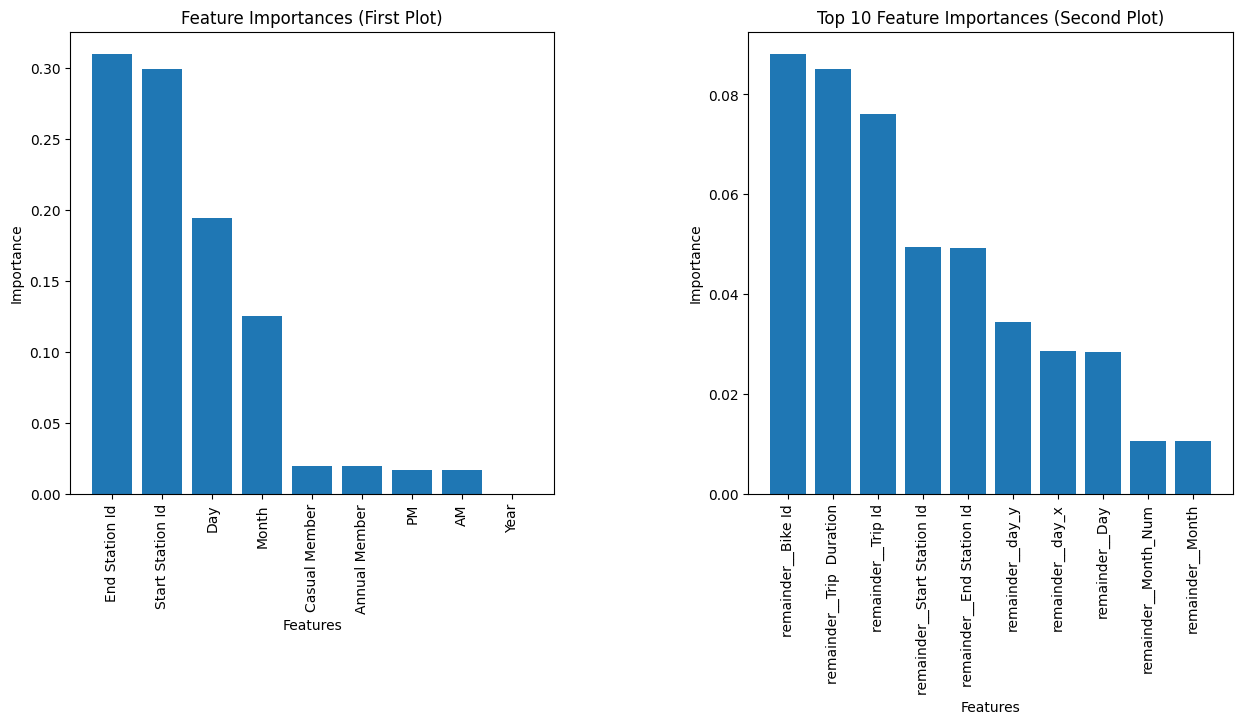

In [ ]:
# Select the top 10 important features for the first plot
top_features_1 = feature_importances_1.head(10)
X_encoded = encode_categorical_features(df)
# Select the features and target for the second plot
features_2 = X_encoded
target_2 = df['Ridership']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features_2, target_2, test_size=0.2, random_state=42)

X_train_2 = X_train_2.dropna().reset_index(drop=True)
y_train_2 = y_train_2.iloc[X_train_2.index]

# Fit the model to the second data
rf.fit(X_train_2, y_train_2)

# Get feature importances for the second plot
importances_2 = rf.feature_importances_

# Create a DataFrame with feature names and importances for the second plot
feature_importances_2 = pd.DataFrame({'Feature': features_2.columns, 'Importance': importances_2})

# Sort the features by importance in descending order for the second plot
feature_importances_2 = feature_importances_2.sort_values(by='Importance', ascending=False)

# Select the top 10 important features for the second plot
top_features_2 = feature_importances_2.head(10)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the feature importances for the first plot
axes[0].bar(feature_importances_1['Feature'], feature_importances_1['Importance'])
axes[0].set_xticklabels(feature_importances_1['Feature'], rotation=90)
axes[0].set_title('Feature Importances (First Plot)')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Importance')

# Plot the feature importances for the second plot
axes[1].bar(top_features_2['Feature'], top_features_2['Importance'])
axes[1].set_xticklabels(top_features_2['Feature'], rotation=90)
axes[1].set_title('Top 10 Feature Importances (Second Plot)')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Importance')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plots
plt.show()


In [ ]:
def sns_jointplot(y_pred, y_test, denormalize=True):
  sns.jointplot(x=y_pred, y=y_test, kind='scatter')
  plt.xlabel('y_pred'); plt.ylabel('y_label')
  plt.show()

Split data by station for train and test dataset. Getting 20% from end of the dataset for test data. Since we want to predict future, it is better to train model based on 80% historical data and test it on last 20%.

In [ ]:
def split_data_by_station(df, X_encoded):
    # Create empty lists to store the train-test split data
    X_train = []
    X_test = []
    y_train = []
    y_test = []

    # Iterate over each unique station
    for station in df['Start Station Name'].unique():
        # Get the data for the current station
        station_data = X_encoded[X['Start Station Name'] == station]
        target_data = y[X['Start Station Name'] == station]

        # Determine the number of samples to include in the test set
        test_size = int(len(station_data) * 0.2)

        # Split the data into train and test sets
        station_X_train = station_data[:-test_size]
        station_X_test = station_data[-test_size:]
        station_y_train = target_data[:-test_size]
        station_y_test = target_data[-test_size:]

        # Append the station-specific data to the overall train-test split
        X_train.append(station_X_train)
        X_test.append(station_X_test)
        y_train.append(station_y_train)
        y_test.append(station_y_test)

    # Concatenate the train-test split data
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
    y_train = pd.concat(y_train)
    y_test = pd.concat(y_test)

    return X_train, X_test, y_train, y_test

# Linear Regression

In [ ]:
df['Ridership'] = df.groupby('Day')['Day'].transform('count')
df

Trip Id  Trip  Duration  Start Station Id          Start Time  \
1777364  12721681             339              7007 2021-07-26 00:02:00   
1228238  12088157             638              7432 2021-06-18 17:47:00   
884082   11694769             290              7542 2021-05-27 17:16:00   
1685910  12618027             362              7123 2021-07-20 14:42:00   
3193856  14357365             437              7060 2021-11-01 18:29:00   
...           ...             ...               ...                 ...   
2242044  13254000             286              7272 2021-08-24 11:23:00   
100895   10767876            1033              7402 2021-02-07 11:12:00   
3015136  14146385             347              7012 2021-10-15 14:41:00   
763760   11559117            1356              7207 2021-05-20 20:30:00   
2702001  13780801             284              7389 2021-09-22 09:08:00   

                              Start Station Name  End Station Id  \
1777364                    College St / Huron St          7163.0   
1228238                 Frederick St / King St E          7260.0   
884082                      Queen St W / John St          7298.0   
1685910                      424 Wellington St W          7211.0   
3193856              Princess St / Adelaide St E          7236.0   
...                                          ...             ...   
2242044          Yonge St / Dundonald St - SMART          7066.0   
100895             Wellington St W / Bathurst St          7411.0   
3015136  Elizabeth St / Edward St (Bus Terminal)          7462.0   
763760                 Dundas St W / Crawford St          7259.0   
2702001           College Park- Gerrard Entrance          7022.0   

                   End Time                     End Station Name  Bike Id  \
1777364 2021-07-26 00:08:00                   Yonge St / Wood St   5191.0   
1228238 2021-06-18 17:58:00          Spadina Ave / Adelaide St W   4316.0   
884082  2021-05-27 17:20:00          Bathurst St / Adelaide St W   4940.0   
1685910 2021-07-20 14:48:00         Fort York Blvd / Garrison Rd   4537.0   
3193856 2021-11-01 18:37:00  Thompson St / Broadview Ave - SMART   6291.0   
...                     ...                                  ...      ...   
2242044 2021-08-24 11:28:00         Willcocks St / St. George St   3994.0   
100895  2021-02-07 11:30:00                   Little Norway Park   5891.0   
3015136 2021-10-15 14:47:00             Richmond St E / Yonge St   4615.0   
763760  2021-05-20 20:52:00  Lower Spadina Ave / Lake Shore Blvd   4916.0   
2702001 2021-09-22 09:12:00               Simcoe St / Queen St W   2656.0   

             User Type  Month  Day  Year      Time AM-PM  Ridership  Month_Num  
1777364  Annual Member      7   26  2021  12:02:00    AM       5542          7  
1228238  Annual Member      6   18  2021  05:47:00    PM       6676          6  
884082   Annual Member      5   27  2021  05:16:00    PM       6536          5  
1685910  Annual Member      7   20  2021  02:42:00    PM       6852          7  
3193856  Casual Member     11    1  2021  06:29:00    PM       6575         11  
...                ...    ...  ...   ...       ...   ...        ...        ...  
2242044  Annual Member      8   24  2021  11:23:00    AM       7512          8  
100895   Annual Member      2    7  2021  11:12:00    AM       6145          2  
3015136  Casual Member     10   15  2021  02:41:00    PM       6787         10  
763760   Casual Member      5   20  2021  08:30:00    PM       6852          5  
2702001  Annual Member      9   22  2021  09:08:00    AM       6277          9  

[200000 rows x 17 columns]

If I use one-hot encoding for all features the model will converge for the linear regression. Otherwise no.

In [ ]:
def linear_regression_analysis(df, time_period_mapping):
    df_lr = df.copy()
    df_lr['Time_Period_Num'] = df['AM-PM'].map(time_period_mapping)
    time_period_dummies = pd.get_dummies(df['AM-PM'])
    df_lr = pd.concat([df_lr, time_period_dummies], axis=1)

    usertype_dummies = pd.get_dummies(df_lr['User Type'])
    # Concatenate the dummy variables to the original dataframe
    df_lr = pd.concat([df_lr, usertype_dummies], axis=1)

    X_lr = df_lr[['Year', 'Month','Day', 'Start Station Id', 'End Station Id','AM', 'PM', 'Annual Member','Casual Member']]
    y_lr = df_lr['Ridership']

    X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train_lr, y_train_lr)

    y_pred_lr = model.predict(X_test_lr)

    rmse = mean_squared_error(y_test_lr, y_pred_lr, squared=False)

    print("Root Mean Squared Error:", rmse)
    sns_jointplot(y_pred_lr, y_test_lr)
    return model

Root Mean Squared Error: 598.8733483746286


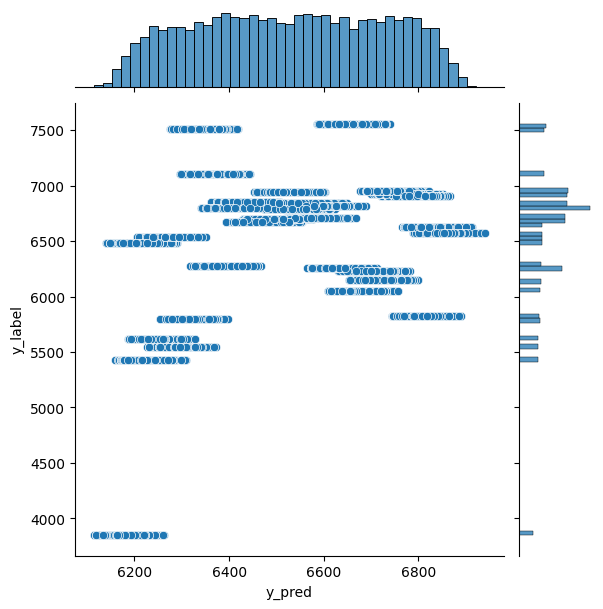

In [ ]:
df2 = df.dropna().reset_index(drop=True)
model_lr = linear_regression_analysis(df2, time_period_mapping)

# Linear Poisson

This code snippet is related to Poisson regression which is a specific type of generalized linear model (GLM).

**Why did I choose this model?**


*   Appropriate for count data: Poisson regression is specifically designed for count data, where the response variable represents the number of occurrences or events. It is well-suited for situations where the dependent variable follows a Poisson distribution.
*   Interpretability: Poisson regression provides interpretable coefficients that can be directly associated with the change in the expected count of the dependent variable for a unit change in the predictor variable(s).



In [ ]:
# Linear Poisson- GLM
import statsmodels.api as sm

def poisson_regression_analysis(X_train, y_train, X_test, y_test):
    # Define the Poisson regression model
    model = sm.GLM(y_train, X_train, family=sm.families.Poisson())

    # Fit the model to the training data
    result = model.fit()

    # Obtain the predicted values from the GLM model
    #y_pred = result.fittedvalues
    y_pred = result.predict(X_test)
    # Calculate the squared differences
    squared_diff = np.square(y_pred - y_train)

    squared_diff = np.square(y_pred - y_test)

    # Calculate the mean squared differences
    mse = np.mean(squared_diff)

    # Calculate the RMSE
    rmse = np.sqrt(mse)

    print('RMSE:', rmse)

    sns.jointplot(x=y_pred, y=y_test, kind='scatter')
    plt.xlabel('y_pred')
    plt.ylabel('y_label')
    plt.show()
    return model, rmse

In [ ]:

'''df_xgb = df.dropna().reset_index(drop=True)
X = df_xgb.drop('Ridership', axis=1)
y = df_xgb['Ridership']
X_encoded = encode_categorical_features(df_xgb)
X_train_GLM, X_test_GLM, y_train_GLM, y_test_GLM = split_data_by_station(df_xgb, X_encoded)
model_GLM, rmse = poisson_regression_analysis(X_train_GLM, y_train_GLM,X_test_GLM, y_test_GLM )'''

date is a column in the dataframe.
date is a column in the dataframe.
date is a column in the dataframe.
Good News! Date is converted!


In [ ]:
'''REMOVE_COVID19_DATA = False
if REMOVE_COVID19_DATA:
  df_xgb = df.drop('Covid19',axis=1)
else:
  df_xgb =df
X = df_xgb.drop('Ridership', axis=1)
y = df_xgb['Ridership']
X_encoded = encode_categorical_features(df_xgb)
X_train_GLM, X_test_GLM, y_train_GLM, y_test_GLM = split_data_by_station(df_xgb, X_encoded)
model_GLM, rmse = poisson_regression_analysis(X_train_GLM, y_train_GLM,X_test_GLM, y_test_GLM )'''

# Random Forest

This code snippet defines a function random_forest_regression that performs random forest regression using the RandomForestRegressor from the scikit-learn library.

**Why did I choose this model?**


*   Robustness to outliers and noise: Random forest regression is less sensitive to outliers and noise in the data compared to some other regression algorithms. It can handle noisy data and outliers by averaging the predictions from multiple trees.
*   Non-linearity and interactions: Random forest regression can capture complex non-linear relationships and interactions between features without explicitly specifying them. It can automatically learn and model non-linear patterns in the data.
*   Reduced risk of overfitting: Random forest regression mitigates overfitting by averaging predictions from multiple trees. The ensemble nature of the algorithm helps generalize well to unseen data and reduce the risk of overfitting on the training data.

* Handle missing data: Random forest regression can handle missing data without imputation. It can utilize available information from other features to make predictions without explicitly imputing missing values.

Please note that this model has a couple of disadvantage such as Lack of interpretability, and Computational complexity.

Overall, the ensemble nature of these algorithms allows them to harness the power of combining multiple models, mitigating the weaknesses of individual models and improving overall predictive accuracy.

In [ ]:
def random_forest_regression(X_train_rf, y_train_rf, X_test_rf, y_test_rf):
    # Initialize the Random Forest regressor
    rf_regressor = RandomForestRegressor(
        n_estimators=100,  # Number of trees in the forest
        max_depth=10,       # Maximum depth of each tree
        min_samples_split=2,  # Minimum number of samples required to split an internal node
        min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
        max_features='auto',  # Number of features to consider when looking for the best split
        random_state=42
    )

    # Fit the model to the training data
    rf_regressor.fit(X_train_rf, y_train_rf)

    # Make predictions on the test set
    y_pred_rf = rf_regressor.predict(X_test_rf)

    # Evaluate the model
    rmse = mean_squared_error(y_test_rf, y_pred_rf)**0.5
    print("Root Mean Squared Error:", rmse)

    sns_jointplot(y_pred_rf, y_test_rf)

    return rf_regressor

date is a column in the dataframe.
date is a column in the dataframe.
date is a column in the dataframe.
Good News! Date is converted!


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Root Mean Squared Error: 20.178622845964135


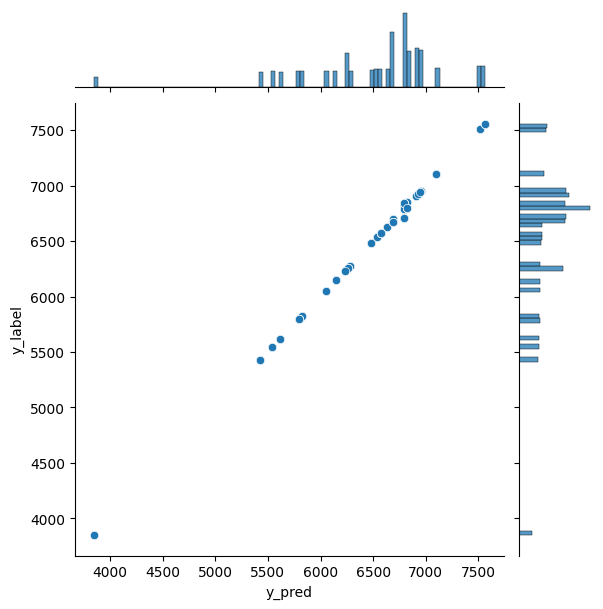

In [ ]:
df2 = df.dropna().reset_index(drop=True)
X_encoded = encode_categorical_features(df2)
X = df2.drop('Ridership', axis=1)
y = df2['Ridership']
X_train, X_test, y_train, y_test = split_data_by_station(df2, X_encoded)

model_rf = random_forest_regression(X_train, y_train, X_test, y_test)

# XGBoost Regression

This code snippet defines a function xgboost_regression  that performs XGBoost regression.

**Why did I choose this model?**


*   Highly accurate predictions: XGBoost regression has been widely recognized for its exceptional predictive performance. It excels at capturing complex non-linear relationships and interactions in the data, allowing for accurate predictions even in challenging scenarios.

*   Handles diverse data types: XGBoost regression can handle a wide range of data types, including both numerical and categorical features. It incorporates techniques like one-hot encoding to handle categorical variables, enabling effective modeling with diverse feature types.
*   XGBoost has gained popularity and has a large and active user community. This means that resources, tutorials, and support are readily available, making it easier to implement, debug, and optimize XGBoost regression models.


XGBoost is an ensemble method that uses a gradient boosting framework. It builds an ensemble of weak learners (decision trees) sequentially, with each new tree correcting the errors of the previous trees. Random Forest grows decision trees in parallel, where each tree is built independently without considering the previous trees. In contrast, XGBoost builds trees sequentially, with each new tree attempting to minimize the loss function by adding it to the ensemble.


In [ ]:
def xgboost_regression(X_train_rf, y_train_rf, X_test_rf, y_test_rf):
    # Initialize the XGBoost regressor
    # The defualt objcetive is reg:squarederror
    xgb_regressor = xgb.XGBRegressor(
        n_estimators=1000,  # Number of boosting rounds
        learning_rate=0.1,  # Learning rate
        max_depth=5,        # Maximum depth of each tree
        subsample=0.8,      # Subsample ratio of the training instances
        colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
        random_state=42
    )

    # Fit the model to the training data
    xgb_regressor.fit(X_train_rf, y_train_rf)

    # Make predictions on the test set
    y_pred_gxb = xgb_regressor.predict(X_test_rf)

    # Evaluate the model
    rmse = mean_squared_error(y_test_rf, y_pred_gxb)**0.5
    print("Root Mean Squared Error:", rmse)

    sns_jointplot(y_pred_gxb, y_test_rf)

    return xgb_regressor, rmse

date is a column in the dataframe.
date is a column in the dataframe.
date is a column in the dataframe.
Good News! Date is converted!
Root Mean Squared Error: 0.029806263253143655


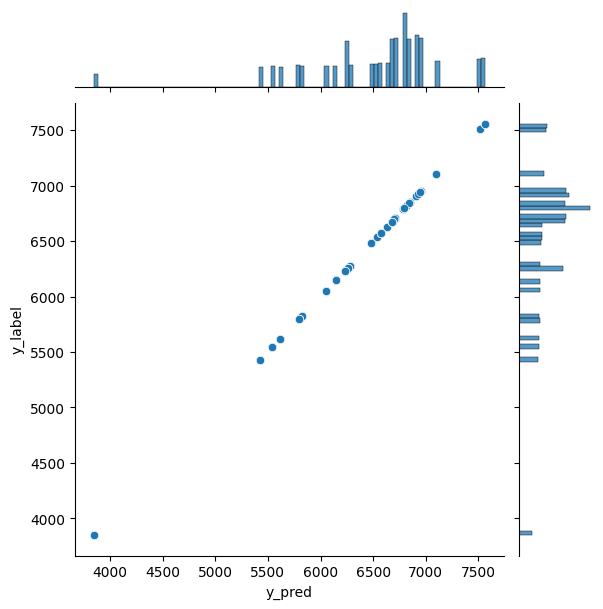

In [ ]:
REMOVE_COVID19_DATA = False
if REMOVE_COVID19_DATA:
  df_xgb = df.drop('Covid19',axis=1)
else:
  df_xgb =df

X = df_xgb.drop('Ridership', axis=1)
y = df_xgb['Ridership']
X_encoded = encode_categorical_features(df_xgb)
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = split_data_by_station(df_xgb, X_encoded)
model_xgb, rmse = xgboost_regression(X_train_xgb, y_train_xgb, X_test_xgb, y_test_xgb)

# XGBoost Poisson

This code snippet defines the XGBoost poisson.

**Why did I choose this model?**


*   Poisson Objective: By setting objective='count:poisson', the XGBoost regressor is tailored for count data, such as the number of occurrences or events.




In [ ]:
def xgboost_poisson_regression(X_train_rf, y_train_rf, X_test_rf, y_test_rf):
    # Calculate the mean of the target variable for setting base_score
    mean_y_train = y_train_rf.mean()

    # Initialize the XGBoost regressor with Poisson objective and evaluation metric
    xgb_regressor = xgb.XGBRegressor(
        objective='count:poisson',
        eval_metric='poisson-nloglik',
        n_estimators=1000,  # Number of boosting rounds
        learning_rate=0.1,  # Learning rate
        max_depth=5,        # Maximum depth of each tree
        subsample=0.8,      # Subsample ratio of the training instances
        colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
        base_score=mean_y_train,  # Set base_score to the mean of the target variable
        random_state=42
    )

    # Set the parameters for early stopping
    early_stopping_rounds = 10
    eval_set = [(X_test_rf, y_test_rf)]

    # Train the model with early stopping
    xgb_regressor.fit(X_train_rf, y_train_rf, eval_set=eval_set, early_stopping_rounds=early_stopping_rounds, verbose=False)

    # Get the best iteration (number of trees)
    best_iteration = xgb_regressor.best_iteration

    # Make predictions using the best iteration
    y_pred_gxb = xgb_regressor.predict(X_test_rf)

    # Evaluate the predictions using the evaluation metric of your choice
    rmse = mean_squared_error(y_test_rf, y_pred_gxb)**0.5

    # Print the evaluation metrics
    print("Mean Squared Error (MSE): ", rmse)

    sns_jointplot(y_pred_gxb, y_test_rf)

    return xgb_regressor


date is a column in the dataframe.
date is a column in the dataframe.
date is a column in the dataframe.
Good News! Date is converted!


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Squared Error (MSE):  3.0699585285390887


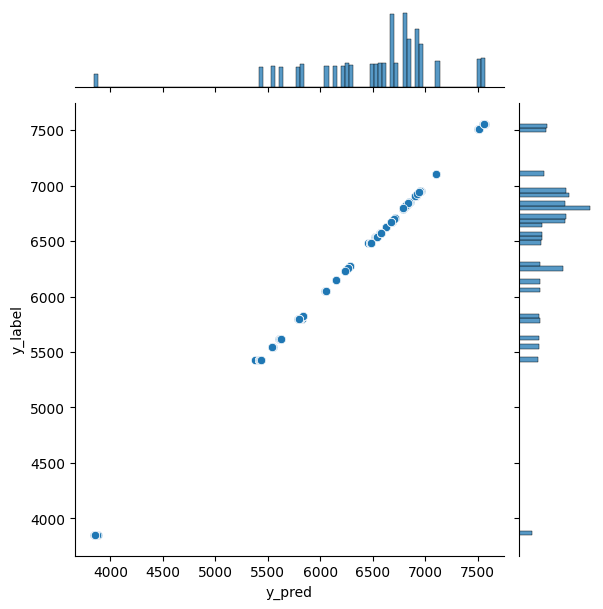

In [ ]:
df2 = df.dropna().reset_index(drop=True)
X_encoded = encode_categorical_features(df2)
X = df2.drop('Ridership', axis=1)
y = df2['Ridership']
X_train, X_test, y_train, y_test = split_data_by_station(df2, X_encoded)

model_xgb_poisson = xgboost_poisson_regression(X_train, y_train, X_test, y_test)

In [ ]:
def xgboost_poisson_regression(X_train_rf, y_train_rf, X_test_rf, y_test_rf):
    # Convert the training and testing data to DMatrix format (optimized for XGBoost)
    dtrain = xgb.DMatrix(X_train_rf, label=y_train_rf)
    dtest = xgb.DMatrix(X_test_rf, label=y_test_rf)
    mean_y_train = y_train_rf.mean()
    # Set the XGBoost parameters for Poisson regression
    params = {
        'objective': 'count:poisson',
        'eval_metric': 'poisson-nloglik',
        'learning_rate': 0.1,       # Learning rate
        'max_depth': 10,            # Maximum depth of each tree
        'subsample': 0.8,           # Subsample ratio of the training instances
        'colsample_bytree': 0.8,    # Subsample ratio of columns when constructing each tree
        'random_state': 42,
        'base_score': mean_y_train  # Set base_score to the mean of the target variable
    }

    # Train the XGBoost model
    num_rounds = 1000  # Adjust the number of boosting rounds as needed
    model = xgb.train(params, dtrain, num_rounds)

    # Evaluate the model on the test data
    predictions = model.predict(dtest)
    # Evaluate the predictions using the evaluation metric of your choice
    rmse = mean_squared_error(y_test_rf, predictions)**0.5
    # Print the evaluation metrics
    print("Mean Squared Error (MSE): ", rmse)

    sns.jointplot(x=predictions, y=y_test_rf, kind='scatter')
    plt.xlabel('y_pred'); plt.ylabel('y_label')
    plt.show()

    return model

date is a column in the dataframe.
date is a column in the dataframe.
date is a column in the dataframe.
Good News! Date is converted!
Mean Squared Error (MSE):  0.3871397846077126


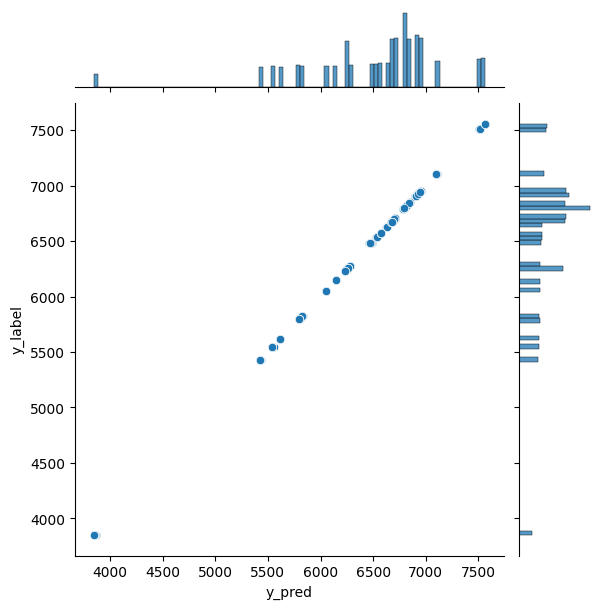

In [ ]:
X_encoded = encode_categorical_features(df)
X = df.drop('Ridership', axis=1)
y = df['Ridership']
X_train, X_test, y_train, y_test = split_data_by_station(df, X_encoded)

model_xgb_poisson_DMatrix = xgboost_poisson_regression(X_train, y_train, X_test, y_test)

# XGBoost Poisson + Exposure

 This code defines a function xgboost_poisson_regression_exposure that performs Poisson regression with exposure using XGBoost.

 **Why did I choose this model?**


*   Accurate modeling of count data with exposure: By using Poisson regression with exposure, the method is specifically designed to model count data where exposure information is relevant. It accounts for the exposure variable, which represents the underlying risk or opportunity for events to occur. This can lead to more accurate predictions and improved modeling of count data compared to traditional regression techniques.


In [ ]:
def xgboost_poisson_regression_exposure(X_train_rf, y_train_rf, X_test_rf, y_test_rf):
    # Calculate the exposure for training and testing data
    #print("X_train_rf", X_train_rf['remainder__Trip  Duration'])
    exposure_train = np.log(X_train_rf['remainder__Month'] + 0.0001)  # Add a small constant to avoid log(0)
    exposure_test = np.log(X_test_rf['remainder__Month'] + 0.0001)

    # Create new dataframes by dropping the 'Total Train Trips' column from features
    X_train_rf_mod = X_train_rf.drop(columns=['remainder__Month'])
    X_test_rf_mod = X_test_rf.drop(columns=['remainder__Month'])

    mean_y_train = y_train_rf.mean()

    # Convert the training and testing data to DMatrix format (optimized for XGBoost)
    dtrain = xgb.DMatrix(X_train_rf_mod, label=y_train_rf, base_margin=exposure_train)
    dtest = xgb.DMatrix(X_test_rf_mod, label=y_test_rf, base_margin=exposure_test)

    # Set the XGBoost parameters for Poisson regression
    params = {
        'objective': 'count:poisson',
        'eval_metric': 'poisson-nloglik',
        'learning_rate': 0.1,       # Learning rate
        'max_depth': 5,            # Maximum depth of each tree
        'subsample': 0.8,           # Subsample ratio of the training instances
        'colsample_bytree': 0.8,    # Subsample ratio of columns when constructing each tree
        'random_state': 42,
        'base_score': mean_y_train  # Set base_score to the mean of the target variable
    }

    # Train the XGBoost model
    num_rounds = 1000  # Adjust the number of boosting rounds as needed
    model = xgb.train(params, dtrain, num_rounds)

    # Evaluate the model on the test data
    predictions = model.predict(dtest)

    # Print the predicted values
    print(predictions)

    # Evaluate the predictions using the evaluation metric of your choice
    rmse = mean_squared_error(y_test_rf, predictions)**0.5
    # Print the evaluation metrics
    print("Mean Squared Error (MSE): ", rmse)

    sns.jointplot(x=predictions, y=y_test_rf, kind='scatter')
    plt.xlabel('y_pred'); plt.ylabel('y_label')
    plt.show()

    return model, rmse

In [ ]:
X_encoded

__Start Station Name_190 Queens Quay E  \
198394                                     0.0   
684049                                     0.0   
82414                                      0.0   
378458                                     0.0   
445249                                     0.0   
...                                        ...   
608701                                     0.0   
276971                                     0.0   
808903                                     0.0   
290196                                     0.0   
216070                                     0.0   

        __Start Station Name_20 Charles St E  \
198394                                   0.0   
684049                                   0.0   
82414                                    0.0   
378458                                   0.0   
445249                                   0.0   
...                                      ...   
608701                                   0.0   
276971                                   0.0   
808903                                   0.0   
290196                                   0.0   
216070                                   0.0   

        __Start Station Name_457 King St. W. at Spadina  \
198394                                              0.0   
684049                                              0.0   
82414                                               0.0   
378458                                              0.0   
445249                                              0.0   
...                                                 ...   
608701                                              0.0   
276971                                              0.0   
808903                                              0.0   
290196                                              0.0   
216070                                              0.0   

        __Start Station Name_Barton St / Howland St - SMART  \
198394                                                0.0     
684049                                                0.0     
82414                                                 0.0     
378458                                                0.0     
445249                                                0.0     
...                                                   ...     
608701                                                0.0     
276971                                                0.0     
808903                                                0.0     
290196                                                0.0     
216070                                                0.0     

        __Start Station Name_Bathurst St / Dundas St W  \
198394                                             0.0   
684049                                             0.0   
82414                                              0.0   
378458                                             0.0   
445249                                             0.0   
...                                                ...   
608701                                             0.0   
276971                                             0.0   
808903                                             0.0   
290196                                             0.0   
216070                                             0.0   

        __Start Station Name_Bathurst St / Fort York Blvd  \
198394                                                0.0   
684049                                                0.0   
82414                                                 0.0   
378458                                                0.0   
445249                                                0.0   
...                                                   ...   
608701                                                0.0   
276971                                                0.0   
808903                                                0.0   
290196                                                0.0

date is a column in the dataframe.
date is a column in the dataframe.
date is a column in the dataframe.
Good News! Date is converted!
[5798.8384 6679.4077 6810.79   ... 6794.0723 6216.9395 5423.085 ]
Mean Squared Error (MSE):  9.685544447998096


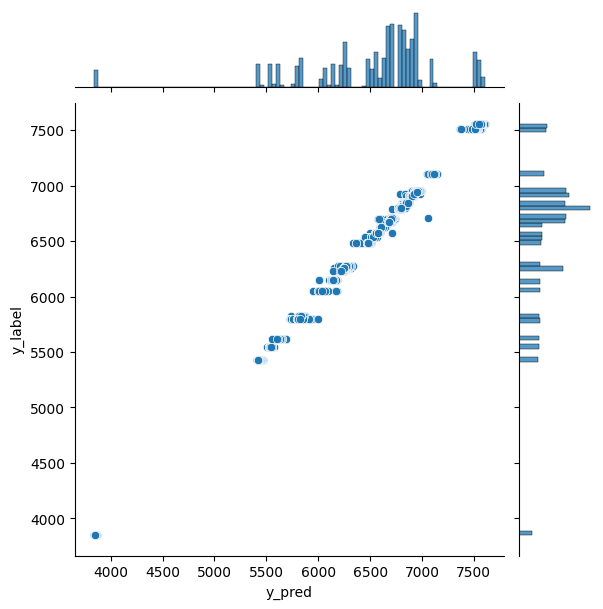

In [ ]:
REMOVE_COVID19_DATA = False
if REMOVE_COVID19_DATA:
  df_xgb = df.drop('Covid19',axis=1)
else:
  df_xgb =df

X = df_xgb.drop('Ridership', axis=1)
y = df_xgb['Ridership']
X_encoded = encode_categorical_features(df_xgb)
X_train_xgb_poisson_exposure, X_test_xgb_poisson_exposure, y_train_xgb_poisson_exposure, y_test_xgb_poisson_exposure = split_data_by_station(df_xgb, X_encoded)
model_xgb_poisson_exposure, rmse = xgboost_poisson_regression_exposure(X_train_xgb_poisson_exposure, y_train_xgb_poisson_exposure, X_test_xgb_poisson_exposure, y_test_xgb_poisson_exposure)

# Feature Engineering- Weather Condition Status

In [ ]:
# Convert the columns to the appropriate data type
df_weather['Year'] = df_weather['Year'].astype(int)
df_weather['Month'] = df_weather['Month'].astype(int)
df_weather['Day'] = df_weather['Day'].astype(int)
df_weather_final = df
# Define a list of columns to map
weather_columns = df_weather.columns.drop(['Year', 'Month', 'Day'])  # Exclude Year, Month, and Day columns

# Map the weather data to the df based on Year, Month, and Day
for column in weather_columns:
    df_weather_final[column] = df_weather_final.apply(lambda row: df_weather.loc[(df_weather['Year'] == row['Year']) & (df_weather['Month'] == row['Month_Num']) & (df_weather['Day'] == row['Day']), column].values[0], axis=1)

# Print the updated dataframe
df_weather_final = df_weather_final.drop('Date/Time', axis = 1)
df_weather_final['Snow on Grnd (cm)'] = df_weather_final['Snow on Grnd (cm)'].fillna('0')
df_weather_final['Spd of Max Gust (km/h)'] = df_weather_final['Spd of Max Gust (km/h)'].fillna(0)
df_weather_final['Snow on Grnd (cm)'] = df_weather_final['Snow on Grnd (cm)'].fillna(0)
df_weather_final['Total Snow (cm)'] = df_weather_final['Total Snow (cm)'].fillna(0)
df_weather_final['Total Rain (mm)'] = df_weather_final['Total Rain (mm)'].fillna(0)
df_weather_final['Min Temp (°C)'] = df_weather_final['Min Temp (°C)'].fillna(0)
df_weather_final['Max Temp (°C)'] = df_weather_final['Max Temp (°C)'].fillna(0)
df_weather_final

Year     Month  Day  Week Number  Rail Corridor   \
0      2019   January    1            1          Barrie   
1      2019   January    1            1          Barrie   
2      2019   January    1            1          Barrie   
3      2019   January    1            1  Lakeshore East   
4      2019   January    1            1  Lakeshore East   
...     ...       ...  ...          ...             ...   
64364  2022  December   31           52  Lakeshore West   
64365  2022  December   31           52          Milton   
64366  2022  December   31           52     Stouffville   
64367  2022  December   31           52     Stouffville   
64368  2022  December   31           52     Stouffville   

      Weekend&Holidays/weekday                  Station      Time Period  \
0                      weekend  ALLANDALE WATERFRONT GO  Weekend/Holiday   
1                      weekend                AURORA GO  Weekend/Holiday   
2                      weekend            UNION STATION  Weekend/Holiday   
3                      weekend             ALDERSHOT GO  Weekend/Holiday   
4                      weekend                OSHAWA GO  Weekend/Holiday   
...                        ...                      ...              ...   
64364                  weekend          WEST HARBOUR GO  Weekend/Holiday   
64365                  weekend                MILTON GO  Weekend/Holiday   
64366                  weekend             MOUNT JOY GO  Weekend/Holiday   
64367                  weekend               OLD ELM GO  Weekend/Holiday   
64368                  weekend            UNION STATION  Weekend/Holiday   

       Ridership  Total Train Trips  Covid19  Month_Num    day_x     day_y  \
0            174                  3        0          1  1.00000  0.000000   
1            379                 10        0          1  1.00000  0.000000   
2            596                 12        0          1  1.00000  0.000000   
3           2759                 35        0          1  1.00000  0.000000   
4           2623                 36        0          1  1.00000  0.000000   
...          ...                ...      ...        ...      ...       ...   
64364       2578                 19        0         12  0.97953 -0.201299   
64365         72                  2        0         12  0.97953 -0.201299   
64366        685                 12        0         12  0.97953 -0.201299   
64367         83                  3        0         12  0.97953 -0.201299   
64368        418                 15        0         12  0.97953 -0.201299   

       Max Temp (°C)  Min Temp (°C)  Total Rain (mm)  Total Snow (cm)  \
0                5.2           -8.0              0.6              0.0   
1                5.2           -8.0              0.6              0.0   
2                5.2           -8.0              0.6              0.0   
3                5.2           -8.0              0.6              0.0   
4                5.2           -8.0              0.6              0.0   
...              ...            ...              ...              ...   
64364            9.7            2.7             18.6              0.0   
64365            9.7            2.7             18.6              0.0   
64366            9.7            2.7             18.6              0.0   
64367            9.7            2.7             18.6              0.0   
64368            9.7            2.7             18.6              0.0   

      Snow on Grnd (cm)  Spd of Max Gust (km/h)  
0                     0                    58.0  
1                     0                    58.0  
2                     0                    58.0  
3                     0                    58.0  
4                     0                    58.0  
...                 ...                     ...  
64364                 0                    41.0  
64365                 0                    41.0  
64366                 0                    41.0  
64367                 0                    41.0  
64368                

Good News! date is converted!
Good News! Date is converted!
[1424.1074    58.53037  729.1249  ... 2798.597    172.22928  176.49922]
Mean Squared Error (MSE):  516.619751896351


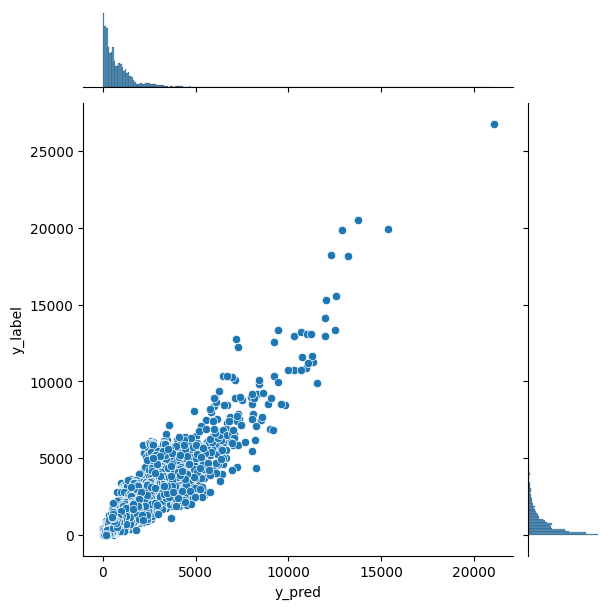

In [ ]:
REMOVE_COVID19_DATA = False
if REMOVE_COVID19_DATA:
  df_weather_final = df_weather_final.drop('Covid19',axis=1)

X_encoded = encode_categorical_features(df_weather_final)
X_train, X_test, y_train, y_test = split_data_by_station(df_weather_final, X_encoded)
model_xgb_poisson_exposure = xgboost_poisson_regression_exposure(X_train, y_train, X_test, y_test)

<ipython-input-303-daaa7aec248b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_weather_final.corr(), annot=True, cmap="YlGnBu")


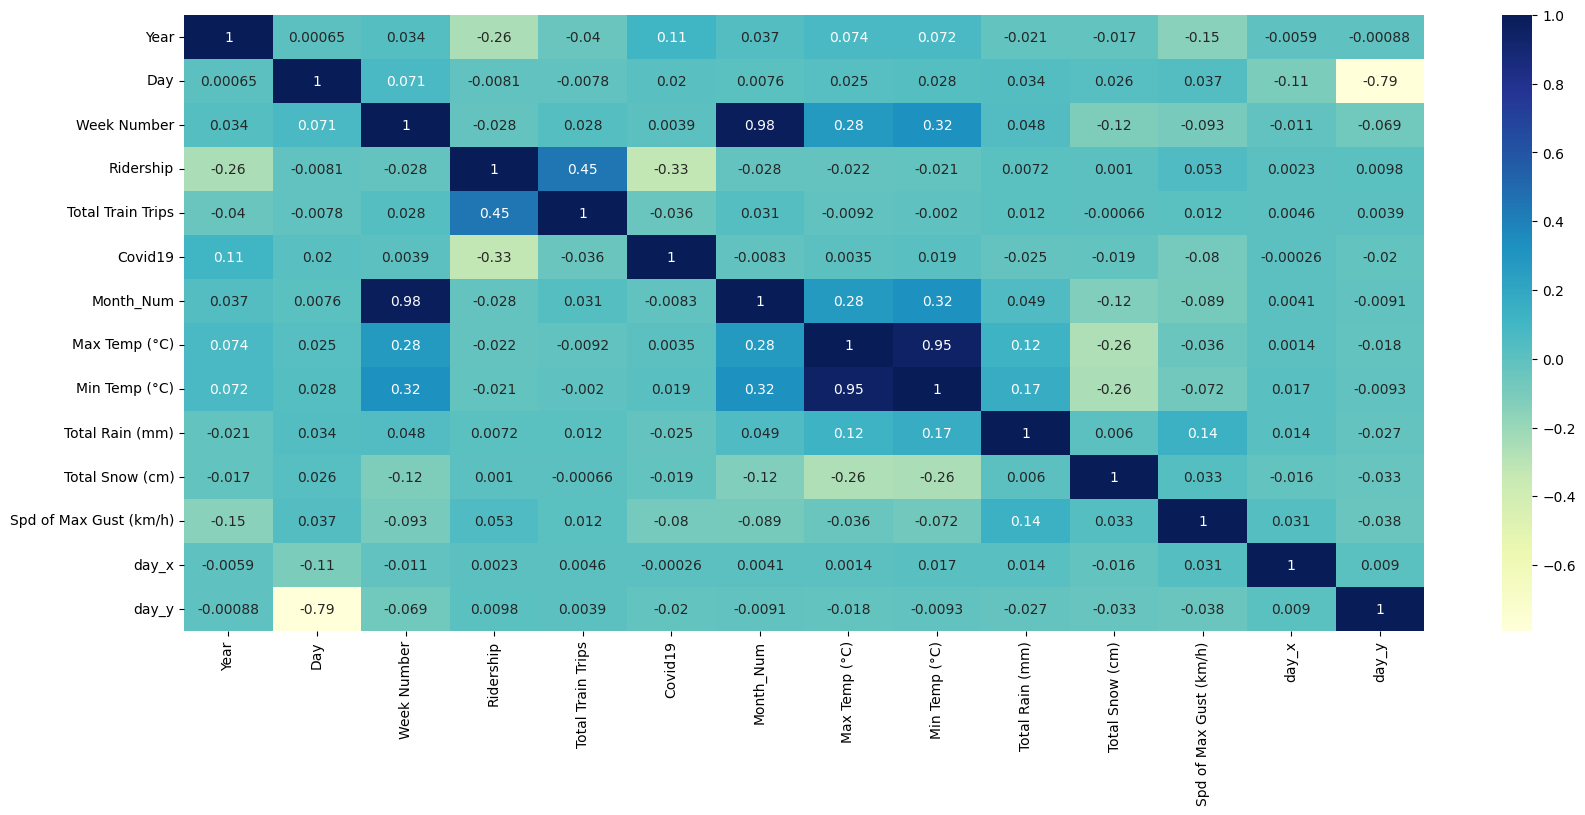

In [ ]:
plt.figure(figsize=(20, 8))
# Create the heatmap with correlation values
sns.heatmap(df_weather_final.corr(), annot=True, cmap="YlGnBu")

# Show the plot
plt.show()

# Feature Engineering - Covid19 Lockdown Status

In [ ]:
# Create a mapping dictionary from df_covid_loc
loc_mapping = df_covid_loc.set_index('Reporting_PHU_ID')[['Reporting_PHU_Latitude', 'Reporting_PHU_Longitude']].to_dict()
# Map latitude and longitude values to df_covid_status
df_covid_status['latitude'] = df_covid_status['Reporting_PHU_id'].map(loc_mapping['Reporting_PHU_Latitude'])
df_covid_status['longitude'] = df_covid_status['Reporting_PHU_id'].map(loc_mapping['Reporting_PHU_Longitude'])
#df_covid_status.to_csv('/content/drive/MyDrive/Colab Notebooks/Ridership Prediction/Dataset/output.csv', index=False)
# Create an empty DataFrame to store the expanded rows
expanded_rows = pd.DataFrame()

# Iterate over each row in the original DataFrame
for _, row in df_station_with_covid_range.iterrows():
    # Get the start_date and end_date from the current row
    start_date = row['start_date']
    end_date = row['end_date']

    # Generate the date range between start_date and end_date
    date_range = pd.date_range(start=start_date, end=end_date)

    # Create a new DataFrame with the date range and repeat the current row's data
    new_rows = pd.DataFrame({
        'date': date_range,
        'latitude': row['latitude'],
        'longitude': row['longitude'],
        'Status_PHU': row['Status_PHU'],
        'Station': row['Station']
        # Repeat for other columns
    })

    # Concatenate the new rows with the expanded_rows DataFrame
    expanded_rows = pd.concat([expanded_rows, new_rows], ignore_index=True)

# Convert the necessary columns to compatible data types
df_covid = df
df_covid['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Day'].astype(str) + '-' + df['Month'].astype(str))

# Perform the merge operation
df_covid = pd.merge(df_covid, expanded_rows[['Station', 'date', 'Status_PHU']], left_on=['Station', 'Date'], right_on=['Station', 'date'], how='left')

df_covid['Status_PHU'] = df_covid['Status_PHU'].fillna('No')

# Print the merged DataFrame
df_covid = df_covid.drop('Date', axis=1)
df_covid = df_covid.drop('date', axis=1)
## No means no data for quarantine.

In [ ]:
ADD_COVID19_DATA_TO_MODEL = False

if ADD_COVID19_DATA_TO_MODEL:
  df = df_covid

In [ ]:
# Geocoding stations to get lat long
'''from geopy.geocoders import Nominatim
import pandas as pd


# Create a geocoder instance
geolocator = Nominatim(user_agent="my_geocoder")


# Get unique station names
unique_stations = df['Station'].unique()

# Create an empty DataFrame to store the station coordinates
station_coordinates = pd.DataFrame(columns=['Station', 'Latitude', 'Longitude'])

# Geocode each unique station name and store the coordinates
for station in unique_stations:
      try:
        location = geolocator.geocode(station + ', Ontario, Canada')
        station_info = {'Station': station, 'Latitude': location.latitude, 'Longitude': location.longitude}
        station_coordinates = pd.concat([station_coordinates, pd.DataFrame(station_info, index=[0])], ignore_index=True)
      except:
        # Handle exceptions if geocoding fails for a particular station
        pass

# Merge the station coordinates with the main dataframe based on the station name
df = pd.merge(df, station_coordinates, on='Station', how='left')'''

'from geopy.geocoders import Nominatim\nimport pandas as pd\n\n\n# Create a geocoder instance\ngeolocator = Nominatim(user_agent="my_geocoder")\n\n\n# Get unique station names\nunique_stations = df[\'Station\'].unique()\n\n# Create an empty DataFrame to store the station coordinates\nstation_coordinates = pd.DataFrame(columns=[\'Station\', \'Latitude\', \'Longitude\'])\n\n# Geocode each unique station name and store the coordinates\nfor station in unique_stations:\n      try:\n        location = geolocator.geocode(station + \', Ontario, Canada\')\n        station_info = {\'Station\': station, \'Latitude\': location.latitude, \'Longitude\': location.longitude}\n        station_coordinates = pd.concat([station_coordinates, pd.DataFrame(station_info, index=[0])], ignore_index=True)\n      except:\n        # Handle exceptions if geocoding fails for a particular station\n        pass\n\n# Merge the station coordinates with the main dataframe based on the station name\ndf = pd.merge(df, stat

In [ ]:
'''

# Convert start_date and end_date columns in df_covid_status to Timestamp objects
df_covid_status['start_date'] = pd.to_datetime(df_covid_status['start_date'])
df_covid_status['end_date'] = pd.to_datetime(df_covid_status['end_date'])

# Define a function to calculate haversine distance between two coordinates
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert coordinates from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Radius of the Earth in kilometers
    R = 6371

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Iterate over each row in df
for index, row in df.iterrows():
    # Get the current date, latitude, and longitude
    date = pd.to_datetime(str(row['Year']) + '-' + str(row['Month']) + '-' + str(row['Day']))
    latitude = row['Latitude']
    longitude = row['Longitude']

    # Calculate the distance between coordinates in df_covid_status and the current latitude and longitude
    distances = df_covid_status.apply(lambda x: haversine_distance(latitude, longitude, x['latitude'], x['longitude']), axis=1)
    closest_index = np.argmin(distances)

    # Get the closest matching row in df_covid_status based on date
    matching_row = df_covid_status.iloc[closest_index]
    matching_start_date = matching_row['start_date']
    matching_end_date = matching_row['end_date']

    # Check if the date in df is within the range of the matching row in df_covid_status
    if matching_start_date <= date <= matching_end_date:
        print('This is a test' + matching_row['Status_PHU'] + str(date))
        # Assign the Status_PHU value for the matching row to the corresponding row in df
        status_phu = matching_row['Status_PHU']
    else:
        status_phu = 'Unknown'

    # Assign the Status_PHU value to the corresponding row in df
    df.at[index, 'Status_PHU'] = status_phu

# Print the updated df dataframe
print(df)
'''

"\n\n# Convert start_date and end_date columns in df_covid_status to Timestamp objects\ndf_covid_status['start_date'] = pd.to_datetime(df_covid_status['start_date'])\ndf_covid_status['end_date'] = pd.to_datetime(df_covid_status['end_date'])\n\n# Define a function to calculate haversine distance between two coordinates\ndef haversine_distance(lat1, lon1, lat2, lon2):\n    # Convert coordinates from degrees to radians\n    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])\n\n    # Radius of the Earth in kilometers\n    R = 6371\n\n    # Haversine formula\n    dlat = lat2 - lat1\n    dlon = lon2 - lon1\n    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2\n    c = 2 * atan2(sqrt(a), sqrt(1 - a))\n    distance = R * c\n    return distance\n\n# Iterate over each row in df\nfor index, row in df.iterrows():\n    # Get the current date, latitude, and longitude\n    date = pd.to_datetime(str(row['Year']) + '-' + str(row['Month']) + '-' + str(row['Day']))\n    la

# Cross-Validation

In [ ]:
def random_forest_regression_cv(X, y, n_estimators=100, max_depth=None, n_folds=5):
    # Create a Random Forest regressor
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)

    # Perform cross-validation using cross_val_score
    scores = cross_val_score(model, X, y, cv=n_folds, scoring='neg_mean_squared_error')

    # Convert the scores to root mean squared error (RMSE)
    rmse_scores = np.sqrt(-scores)

    return rmse_scores

#X_train, X_test, y_train, y_test = split_data_by_station(df, X_encoded)
# Call the function with your data and parameters
rmse_scores = random_forest_regression_cv(X_encoded, df['Ridership'], n_estimators=100, max_depth=None, n_folds=5)

# Print the RMSE scores for each fold
print("RMSE Scores:", rmse_scores)

# Calculate and print the mean RMSE score
mean_rmse = np.mean(rmse_scores)
print("Mean RMSE:", mean_rmse)


RMSE Scores: [1.91944002 0.         0.82708675 0.92496622 0.34262224]
Mean RMSE: 0.8028230467771905


In [ ]:
### XGBoost Regression
# Create an instance of the XGBoost model
xgb_model = xgb.XGBRegressor()

# Define the X and y data
X = X_encoded  # Your input features
y = df['Ridership']  # Your target variable

# Define the number of folds for cross-validation
n_folds = 5

# Perform cross-validation
scores = cross_val_score(xgb_model, X, y, cv=n_folds, scoring='neg_mean_squared_error')

# Convert the scores to root mean squared error (RMSE)
rmse_scores = np.sqrt(-scores)

# Print the RMSE scores for each fold
print("RMSE Scores:", rmse_scores)

# Calculate and print the mean RMSE score
mean_rmse = np.mean(rmse_scores)
print("Mean RMSE:", mean_rmse)

RMSE Scores: [8.20365590e+00 4.66618722e-05 1.04954881e-04 4.26900729e+00
 2.21358773e+00]
Mean RMSE: 2.9372805070467907


In [ ]:
## XGBoost Poisson

xgb_model = xgb.XGBRegressor(objective='count:poisson', eval_metric='poisson-nloglik')
# Define the X and y data
X = X_encoded  # Your input features
y = df['Ridership']  # Your target variable

# Define the number of folds for cross-validation
n_folds = 5

# Perform cross-validation
scores = cross_val_score(xgb_model, X, y, cv=n_folds, scoring='neg_mean_squared_error')

# Convert the scores to root mean squared error (RMSE)
rmse_scores = np.sqrt(-scores)

# Print the RMSE scores for each fold
print("RMSE Scores:", rmse_scores)

# Calculate and print the mean RMSE score
mean_rmse = np.mean(rmse_scores)
print("Mean RMSE:", mean_rmse)

RMSE Scores: [842130.39260041 725570.04090825 727825.17220236 669317.34412482
 667243.55349388]
Mean RMSE: 726417.3006659455


In [ ]:
######### XGBoost mean squared error (MSE)


# Define the number of splits
n_splits = 5
rmse_array = []
# Create the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define the X and y data
X = X_encoded  # Your input features
y = df['Ridership']  # Your target variable

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    # Split the data into train and test sets based on the indices
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate the model on the current fold
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate and print the evaluation metric of interest (e.g., RMSE)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_array.append(rmse)
    print("RMSE:", rmse)

mean_rmse = np.mean(rmse_array)
print("Mean RMSE:", mean_rmse)

RMSE: 7.953680962308787e-05
RMSE: 6.037291843479274
RMSE: 5.692097376701776
RMSE: 0.00010869795614790607
RMSE: 2.7202922450722355
Mean RMSE: 2.889973940003811


In [ ]:
######## XGBoost Poisson
from sklearn.model_selection import StratifiedKFold

# Define the number of splits
n_splits = 5
rmse_array = []
# Create the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define the X and y data
X = X_encoded  # Your input features
y = df['Ridership']  # Your target variable

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    # Split the data into train and test sets based on the indices
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate the model on the current fold
    model = xgb.XGBRegressor(objective='count:poisson', eval_metric='poisson-nloglik')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate and print the evaluation metric of interest (e.g., RMSE)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_array.append(rmse)
    print("RMSE:", rmse)

mean_rmse = np.mean(rmse_array)
print("Mean RMSE:", mean_rmse)

RMSE: 705582.0081212269
RMSE: 623204.9192104017
RMSE: 767260.5050892613
RMSE: 767259.3707301131
RMSE: 767259.0847258525
Mean RMSE: 726113.1775753711


In [ ]:

# Define the number of splits
n_splits = 5
rmse_array = []

# Create the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=None)

# Define the X and y data
X = X_encoded  # Your input features
y = df['Ridership']  # Your target variable

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(X, df['Start Station Name']):
    # Split the data into train and test sets based on the indices
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Calculate the exposure for training and testing data
    exposure_train = np.log(X_train['remainder__Month'] + 0.0001)  # Add a small constant to avoid log(0)
    exposure_test = np.log(X_test['remainder__Month'] + 0.0001)

    # Create new dataframes by dropping the 'Total Train Trips' column from features
    X_train_mod = X_train.drop(columns=['remainder__Month'])
    X_test_mod = X_test.drop(columns=['remainder__Month'])

    # Convert the training and testing data to DMatrix format
    dtrain = xgb.DMatrix(X_train_mod, label=y_train, base_margin=exposure_train)
    dtest = xgb.DMatrix(X_test_mod, label=y_test, base_margin=exposure_test)

    # print(np.min(exposure_test),np.max(exposure_test))
    # continue

    # Set the XGBoost parameters for Poisson regression with exposure
    params = {
        'objective': 'count:poisson',
        'eval_metric': 'poisson-nloglik',
        'learning_rate': 0.1,
        'max_depth': 5,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': 42
    }

    # Train the XGBoost model
    num_rounds = 1000
    model = xgb.train(params, dtrain, num_rounds)

    # Make predictions on the test set
    y_pred = model.predict(dtest)

    # Calculate and print the evaluation metric of interest (e.g., RMSE)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_array.append(rmse)
    print("RMSE:", rmse)

mean_rmse = np.mean(rmse_array)
print("Mean RMSE:", mean_rmse)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RMSE: 2.6464936373528856
RMSE: 2.864275836643147
RMSE: 1.3119325592410067
RMSE: 5.814683007159735
RMSE: 3.043503899301959
Mean RMSE: 3.1361777879397463


# When and Where we need an extra Train????

In [ ]:
df_predict = pd.DataFrame({'Train': df['Total Train Trips'], 'Ridership': df['Ridership'], 'Capacity': df['Total Train Trips']*600})
df_predict['RdiffC'] = df_predict['Capacity']-df_predict['Ridership']
df_predict['RdiffC'].describe()

count    64369.000000
mean       301.934068
std       1789.570722
min     -16907.000000
25%        -25.000000
50%        410.000000
75%       1009.000000
max       9243.000000
Name: RdiffC, dtype: float64

Good News! date is converted!
Good News! Date is converted!
[1829.089      32.438263  484.20435  ... 3050.1074    149.07462
  147.07048 ]
Mean Squared Error (MSE):  598.4364494216776


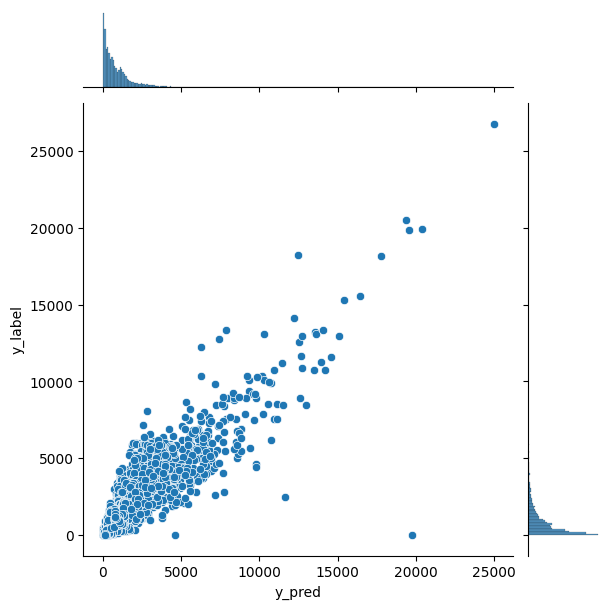

In [ ]:
REMOVE_COVID19_DATA = False
if REMOVE_COVID19_DATA:
  df_xgb = df.drop('Covid19',axis=1)
else:
  df_xgb =df
X = df_xgb.drop('Ridership', axis=1)
y = df_xgb['Ridership']
X_encoded = encode_categorical_features(df_xgb)
X_train_xgb_poisson_exposure, X_test_xgb_poisson_exposure, y_train_xgb_poisson_exposure, y_test_xgb_poisson_exposure = split_data_by_station(df_xgb, X_encoded)
model_xgb_poisson_exposure, rmse = xgboost_poisson_regression_exposure(X_train_xgb_poisson_exposure, y_train_xgb_poisson_exposure, X_test_xgb_poisson_exposure, y_test_xgb_poisson_exposure)

In [ ]:
exposure_test = np.log(X_test_xgb_poisson_exposure['remainder__Total Train Trips'] + 0.0001)

X_test_rf_mod = X_test_xgb_poisson_exposure.drop(columns=['remainder__Total Train Trips'])

dtest = xgb.DMatrix(X_test_rf_mod, label=y_test_xgb_poisson_exposure, base_margin=exposure_test)

y_hat = model_xgb_poisson_exposure.predict(dtest)

df_predict = pd.DataFrame({'Train': X_test_xgb_poisson_exposure['remainder__Total Train Trips'], 'y_hat': y_hat, 'Capacity':X_test_xgb_poisson_exposure['remainder__Total Train Trips']*600})

In [ ]:
from scipy.stats import poisson

# Set the lambda parameter column name
lambda_col = 'y_hat'

# Set the value to compare column name
value_col = 'Capacity'

# Calculate the probability for each row
df_predict['Train_Needed_Prob'] = 1 - poisson.cdf(df_predict[value_col], df_predict[lambda_col])

# Print the DataFrame with the new column
df_predict

Train        y_hat  Capacity  Train_Needed_Prob
54274    4.0  1829.088989    3200.0                0.0
54275    1.0    32.438263     800.0                0.0
54276    3.0   484.204346    2400.0                0.0
54334    4.0  1488.090820    3200.0                0.0
54335    1.0    31.150911     800.0                0.0
...      ...          ...       ...                ...
64313   12.0  1823.154785    9600.0                0.0
64314    6.0   773.230774    4800.0                0.0
64359   36.0  3050.107422   28800.0                0.0
61655    1.0   149.074615     800.0                0.0
62038    1.0   147.070480     800.0                0.0

[12874 rows x 4 columns]

In [ ]:
filtered_df = df_predict[(df_predict['Train_Needed_Prob'] >= 0.2) & (df_predict['Train_Needed_Prob'] <= 0.8)]
print(filtered_df)


       Train        y_hat  Capacity  Train_Needed_Prob
18913    1.0   804.945801     800.0           0.559998
18983    2.0  1585.726196    1600.0           0.353976
19123    2.0  1597.502686    1600.0           0.468462
19285    2.0  1585.984863    1600.0           0.356398
19355    2.0  1616.644165    1600.0           0.654700
19657    2.0  1569.889282    1600.0           0.219384
19727    2.0  1608.462769    1600.0           0.577127
19797    2.0  1598.715820    1600.0           0.480547
17510    1.0   801.392883     800.0           0.510235
55868    1.0   794.744690     800.0           0.416907
56417    1.0   789.787109     800.0           0.349652
56599    1.0   815.214783     800.0           0.695351
56865    1.0   816.502502     800.0           0.710901
57190    1.0   813.857727     800.0           0.678554
60910    1.0   798.369812     800.0           0.467620
61894    1.0   795.440796     800.0           0.426577
62218    1.0   814.507996     800.0           0.686653
